### Senior Honours Project code for University of Edinburgh 4th year undergraduate physics by Lucas Schön
### Latest update: 28 June 2021
### A program which reads in TEM image files, conducts watershedding, and analyses their size distribution in a Bayesian manner, comparing likelihoods of Gaussian vs Lorentzian fits
### Code based largely on work by supervisor Dr. Job Thijssen

# Importing packages

In [1]:
# Import required packages.
import numpy as np
import cv2 as cv
import xlsxwriter
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.patches import Circle
from math import sqrt, pi
%matplotlib inline

# Defining master list

In [2]:
#Defining the master list to be used during the code, containing all the radii amassed over multiple runs
#Do not re-run this after the first time
all_radii = np.array([])

# Reading in the files

In [793]:
#Notes to user about directory and file locations
print("Please keep the directory of images in the same directory as this progam is in.")
print("Also, separate images so that a directory only has images of the same magnification.")
print()

#Asking the user for the folder name and extracting all the files in it
def files(): 
    
    #Listing the subdirectories in the working directory for ease of choice
    print("The current subdirectories in the working directory are: ")
    all_files = os.listdir(os.curdir)
    for i in range(len(all_files)):
        if os.path.isdir(all_files[i]):
            print(all_files[i])
    print()
    
    #Defining folder name from user input
    folder = input("Enter name of directory with images to be analysed: ")
    print()
    
    #Making sure the given folder name is valid
    while os.path.isdir(folder) == False: 
        print("Please enter a valid directory")
        folder = input("Enter name of folder with images to be analysed: ")
    
    #Making a list with all the file names in the folder
    file_list = sorted(glob.glob(folder + "/*"))
    
    #Display all the file names
    print()
    print("These are the loaded files from this folder: ")
    for i in range(len(file_list)): print(file_list[i])

    #Asking for the dimensions of the image, to scale the particle sizes
    dim1, dim2 = input("Enter the dimensions of the images in microns (with an x in between and no spaces): ").split("x")
    dim = float(dim1)*float(dim2)
    print("Thus the area of the given image in microns squared is: " + str(dim))
    
    #Return the list of all the files and the magnification and the dimensions of the image
    return file_list, dim

file_list, dim_microns = files()

Please keep the directory of images in the same directory as this progam is in.
Also, separate images so that a directory only has images of the same magnification.

The current subdirectories in the working directory are: 
test_images
ASSi82_dm3
Out
test_images8
test_images6
ASSi82_2100x
test_images10
test_images11
test_images7
test_images9
.ipynb_checkpoints
ASSi82_3800x
test_images2
test_images5
ASM306
test_images4
test_images3
ASM306_Trials

Enter name of directory with images to be analysed: ASM306_Trials


These are the loaded files from this folder: 
ASM306_Trials/Image01.tif
ASM306_Trials/Image02.tif
ASM306_Trials/Image03.tif
ASM306_Trials/Image04.tif
ASM306_Trials/Image05.tif
ASM306_Trials/Image06.tif
ASM306_Trials/Image07.tif
ASM306_Trials/Image08.tif
ASM306_Trials/Image09.tif
ASM306_Trials/Image10.tif
ASM306_Trials/Image11.tif
ASM306_Trials/Image12.tif
ASM306_Trials/Image13.tif
ASM306_Trials/Image14.tif
ASM306_Trials/Image15.tif
ASM306_Trials/Image16.tif
ASM306_Trials/Image1

# Watershedding

Noting that the file list contains the following files: 
0) ASM306_Trials/Image01.tif
1) ASM306_Trials/Image02.tif
2) ASM306_Trials/Image03.tif
3) ASM306_Trials/Image04.tif
4) ASM306_Trials/Image05.tif
5) ASM306_Trials/Image06.tif
6) ASM306_Trials/Image07.tif
7) ASM306_Trials/Image08.tif
8) ASM306_Trials/Image09.tif
9) ASM306_Trials/Image10.tif
10) ASM306_Trials/Image11.tif
11) ASM306_Trials/Image12.tif
12) ASM306_Trials/Image13.tif
13) ASM306_Trials/Image14.tif
14) ASM306_Trials/Image15.tif
15) ASM306_Trials/Image16.tif
16) ASM306_Trials/Image17.tif
17) ASM306_Trials/Image18.tif
18) ASM306_Trials/Image19.tif
19) ASM306_Trials/Image20.tif
20) ASM306_Trials/Trial21.tif
21) ASM306_Trials/Trial22.tif
22) ASM306_Trials/Trial23.tif
23) ASM306_Trials/Trial24.tif
24) ASM306_Trials/Trial25.tif
25) ASM306_Trials/Trial26.tif
26) ASM306_Trials/Trial27.tif
27) ASM306_Trials/Trial28.tif
28) ASM306_Trials/Trial29.tif
29) ASM306_Trials/Trial30.tif
30) ASM306_Trials/Trial31.tif
31) ASM306_Trials/Trial

<ipython-input-813-7cbeda43e93e>:152: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  circ = Circle((xc,yc),rr,alpha=1.0,edgecolor='red',Fill=False,linewidth=2.0)


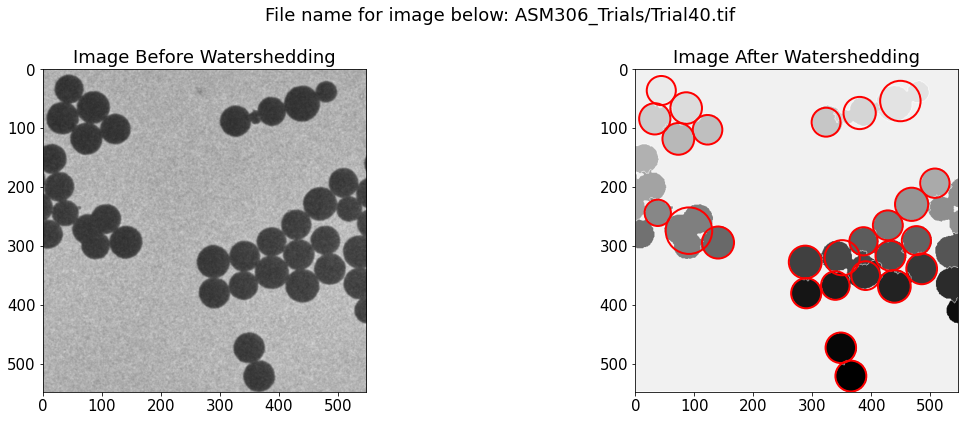

Note that the red circles indicate the identification of one particle.
The list containing all radii is now as follows: 
[0.48584123 0.48681845 0.34591592 0.49253387 0.39841446 0.53300556
 0.48355336 0.53911301 0.48529748 0.3084736  0.40013377 0.56071867
 0.53171607 0.50345565 0.48865898 0.3567378  0.4937118  0.46211086
 0.41209621 0.46382176 0.52502001 0.42571038 0.38300701 0.34971147
 0.46745073 0.53911301 0.48952272 0.52481881 0.52702774 0.46495885
 0.49221213 0.5050265  0.50366538 0.47817245 0.48202209 0.3567378
 0.49349784 0.47706685 0.41426885 0.47938567 0.48026608 0.54018938
 0.54515205 0.48638437 0.38383335 0.44712701 0.46484527 0.47239506
 0.47149995 0.46914215 0.46062295 0.46004939 0.28957819 0.47529254
 0.52431549 0.49392566 0.42990711 0.52732824 0.48952272 0.53439077
 0.43321084 0.52391248 0.45832441 0.4928554  0.50523558 0.47217144
 0.46767661 0.48388086 0.41996571 0.50763378 0.46981702 0.38793863
 0.48070569 0.37407918 0.47529254 0.42359643 0.44748117 0.56783088
 0.542335

In [813]:
# Overall: measure area of objects in image via watershed and regionprops. 
#Returns array of all the radii of the particles
def watershedding(file_name):

    #Define all_radii array from previously as global so as to work with it in the function
    global all_radii
    
    # Open image and then display it.
    # NB: without path it is assumed that the image is in the working directory.
    img = cv.imread(file_name,cv.IMREAD_COLOR)

    # Convert image to grayscale.
    invgray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)


    # If required, invert grayscale image and display it.
    # NB: need bright particles on dark background later on.
    #MAKE IF STATEMENTS HERE, iF NAME IS PARTICLES.PNG THEN INVERT
    gray = cv.bitwise_not(invgray)

    # Gaussian blur to prevent graniness in particles later when binarizing.
    # Checked: Gaussian blurring does not lead to wavy separation lines later on!
    gray1 = cv.GaussianBlur(gray,(3,3),0)


    # TEM: use regular threshold
    # SEM: use adaptive threshold on gray image and display it - intended to deal with uneven illumination.
    #block_size = 25
    #thresh = cv.adaptiveThreshold(gray1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size , 0)
    ret, thresh = cv.threshold(gray1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


    # Thresholding leads to 'holes' and non-spherical shapes.
    # The latter may not be a problem, as we are only looking for foreground.
    # Use morphological 'closing' to fill holes (size 1 too small and 5 too large).
    # Iterations is a balance between not filling holes (too small) and connecting particles (too large).
    # NB: unfilled holes leads to crescent shapes in sure foreground,
    # which leads to odd particle shapes in watershed image.
    close_kernel_size = 3
    close_iter = 1
    kernel = np.ones((close_kernel_size,close_kernel_size),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_CLOSE,kernel,iterations = close_iter)


    # Identify sure background and display.
    bg_iter = 2
    sure_bg = cv.dilate(opening,kernel,iterations=bg_iter)


    # Identify sure foreground and display.
    # NB: set dist_cut carefully: too large and some particles will be missed,
    # too small and some particles will end up connected,
    # a value of 0.60 seems to work well.
    # NB: sure foreground not a byte array so needs normalizing.
    # NB: array = cv.normalize(array, target_array, min val, max val, shift and scale, byte)
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,3)
    dist_cut = 0.60*dist_transform.max()
    ret, sure_fg = cv.threshold(dist_transform,dist_cut,255,0)
    sure_fg = cv.normalize(sure_fg, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1)


    # Subtract sure_fg from sure_bg to identify unsure region and display it.
    unknown = cv.subtract(sure_bg,sure_fg)


    # Label connected components with markers and display.
    # NB: markers not a byte array so needs normalizing.
    ret, markers = cv.connectedComponents(sure_fg)
    markers_vis = cv.normalize(markers, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1)


    # Add one to all labels so that sure background is not 0 but 1,
    # otherwise the watershed algorithm will try and look for boundaries in the sure_bg
    markers = markers+1

    # Mark the region of unknown with zero so that watershed will look for boundaries there.
    markers[unknown==255] = 0

    # Perform watershed on img using markers and display.
    # NB: watershed needs normalzing before display.
    #watershed = cv.watershed(img,markers)
    watershed = cv.watershed(img,markers)
    watershed_vis = cv.normalize(watershed, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1)


    # Use regionprops to get array with identified region properties from watershed.
    f = regionprops(watershed)

    # Loop through f and append area of each labeled object to list.
    # Adding 1 to markers above was necessary but means sure_bg is now region 1,
    # hence start at 1 rather than 0.
    areas = np.array([])
    for i in range(1, len(f), 1):
        areas = np.append(areas, f[i].area)
    print("There are " + str(len(areas)) + " areas in the current image of " + str(file_name))

        
    # dimensions variable is in form (y, x, channel) where y and x are in pixels.
    # ymax and xmax are used for excluding border particles. dim_pix used for converting areas to microns^2 from pixels
    dimensions = img.shape
    ymax = dimensions[0]
    xmax = dimensions[1]
    dim_pix = ymax * xmax

    
    #Using the size (i.e. dimensions, in microns) of image to determine particle radii in microns
    #areas_dim = areas / dim_microns
    areas_dim = areas * dim_microns / dim_pix
    radii = np.sqrt(areas_dim / np.pi)

    #Adding to a master list
    all_radii = np.append(all_radii, radii)

    #Displaying the before and after watershedding images using subplots
    fig, axarr = plt.subplots(1,2,figsize=(18,6)) 
    fig.suptitle("File name for image below: " + file_name)
    axarr[0].imshow(img, cmap="gray_r")
    axarr[0].set_title("Image Before Watershedding")
    axarr[1].imshow(watershed_vis, cmap="gray_r")
    axarr[1].set_title("Image After Watershedding")
    fig.tight_layout()
    
    
    #Defining the median radius in pixels so as to use as a measure to exclude border particles (mean can be distorted)
    median_rad = np.median(np.sqrt(areas/np.pi))
   
    #Loop through f and append area of each labeled object to list.
    particles = []
    for i in range(len(f)):
        yc   = f[i].centroid[0]
        xc   = f[i].centroid[1]
        area = f[i].area
        
        #First value gives a massive circle covering the whole figure
        #This is not from the watershedding and is not presented in its values,
        #Is some oddity to do with the circles
        #Simply exclude
        #Additionally, apply conditinos that particle is not right by the border using above variables
        
        if i!=0 and yc > median_rad and yc < (ymax - median_rad) and xc > median_rad and xc < (xmax - median_rad):
            particles.append([yc,xc,area])
            
    #Create a figure. Equal aspect so circles look circular
    axarr[1].set_aspect('equal')
    
    #Now, loop through coord arrays, and create a circle at each x,y pair
    rr = 1
    for item in particles:
        yc = item[0]
        xc = item[1]
        rr = sqrt(item[2]/pi)
        circ = Circle((xc,yc),rr,alpha=1.0,edgecolor='red',Fill=False,linewidth=2.0)
        axarr[1].add_patch(circ)

    #Show the image
    plt.show()

    return all_radii

#Executing the function for all the files in the directory, compiling all the radii into the all_radii array

print("Noting that the file list contains the following files: ")
for i in range(len(file_list)): print(str(i) + ") " + str(file_list[i]))
filenum = input("Choose the number of the file you wish to analyse. If you would rather analyse them all at once, write 'all'. ")

if filenum == "all":
    for i in range(len(file_list)): 
        all_radii = watershedding(file_list[i])
    print("Total list has " + str(len(all_radii)) + " values in it: ")
else:
    all_radii = watershedding(file_list[int(filenum)])
    
print("Note that the red circles indicate the identification of one particle.")
print("The list containing all radii is now as follows: ")
print(all_radii)
    

# Making Histogram

Importing required packages.
Plotting data.
Constructing histogram for overplotting with errors and curve fitting.


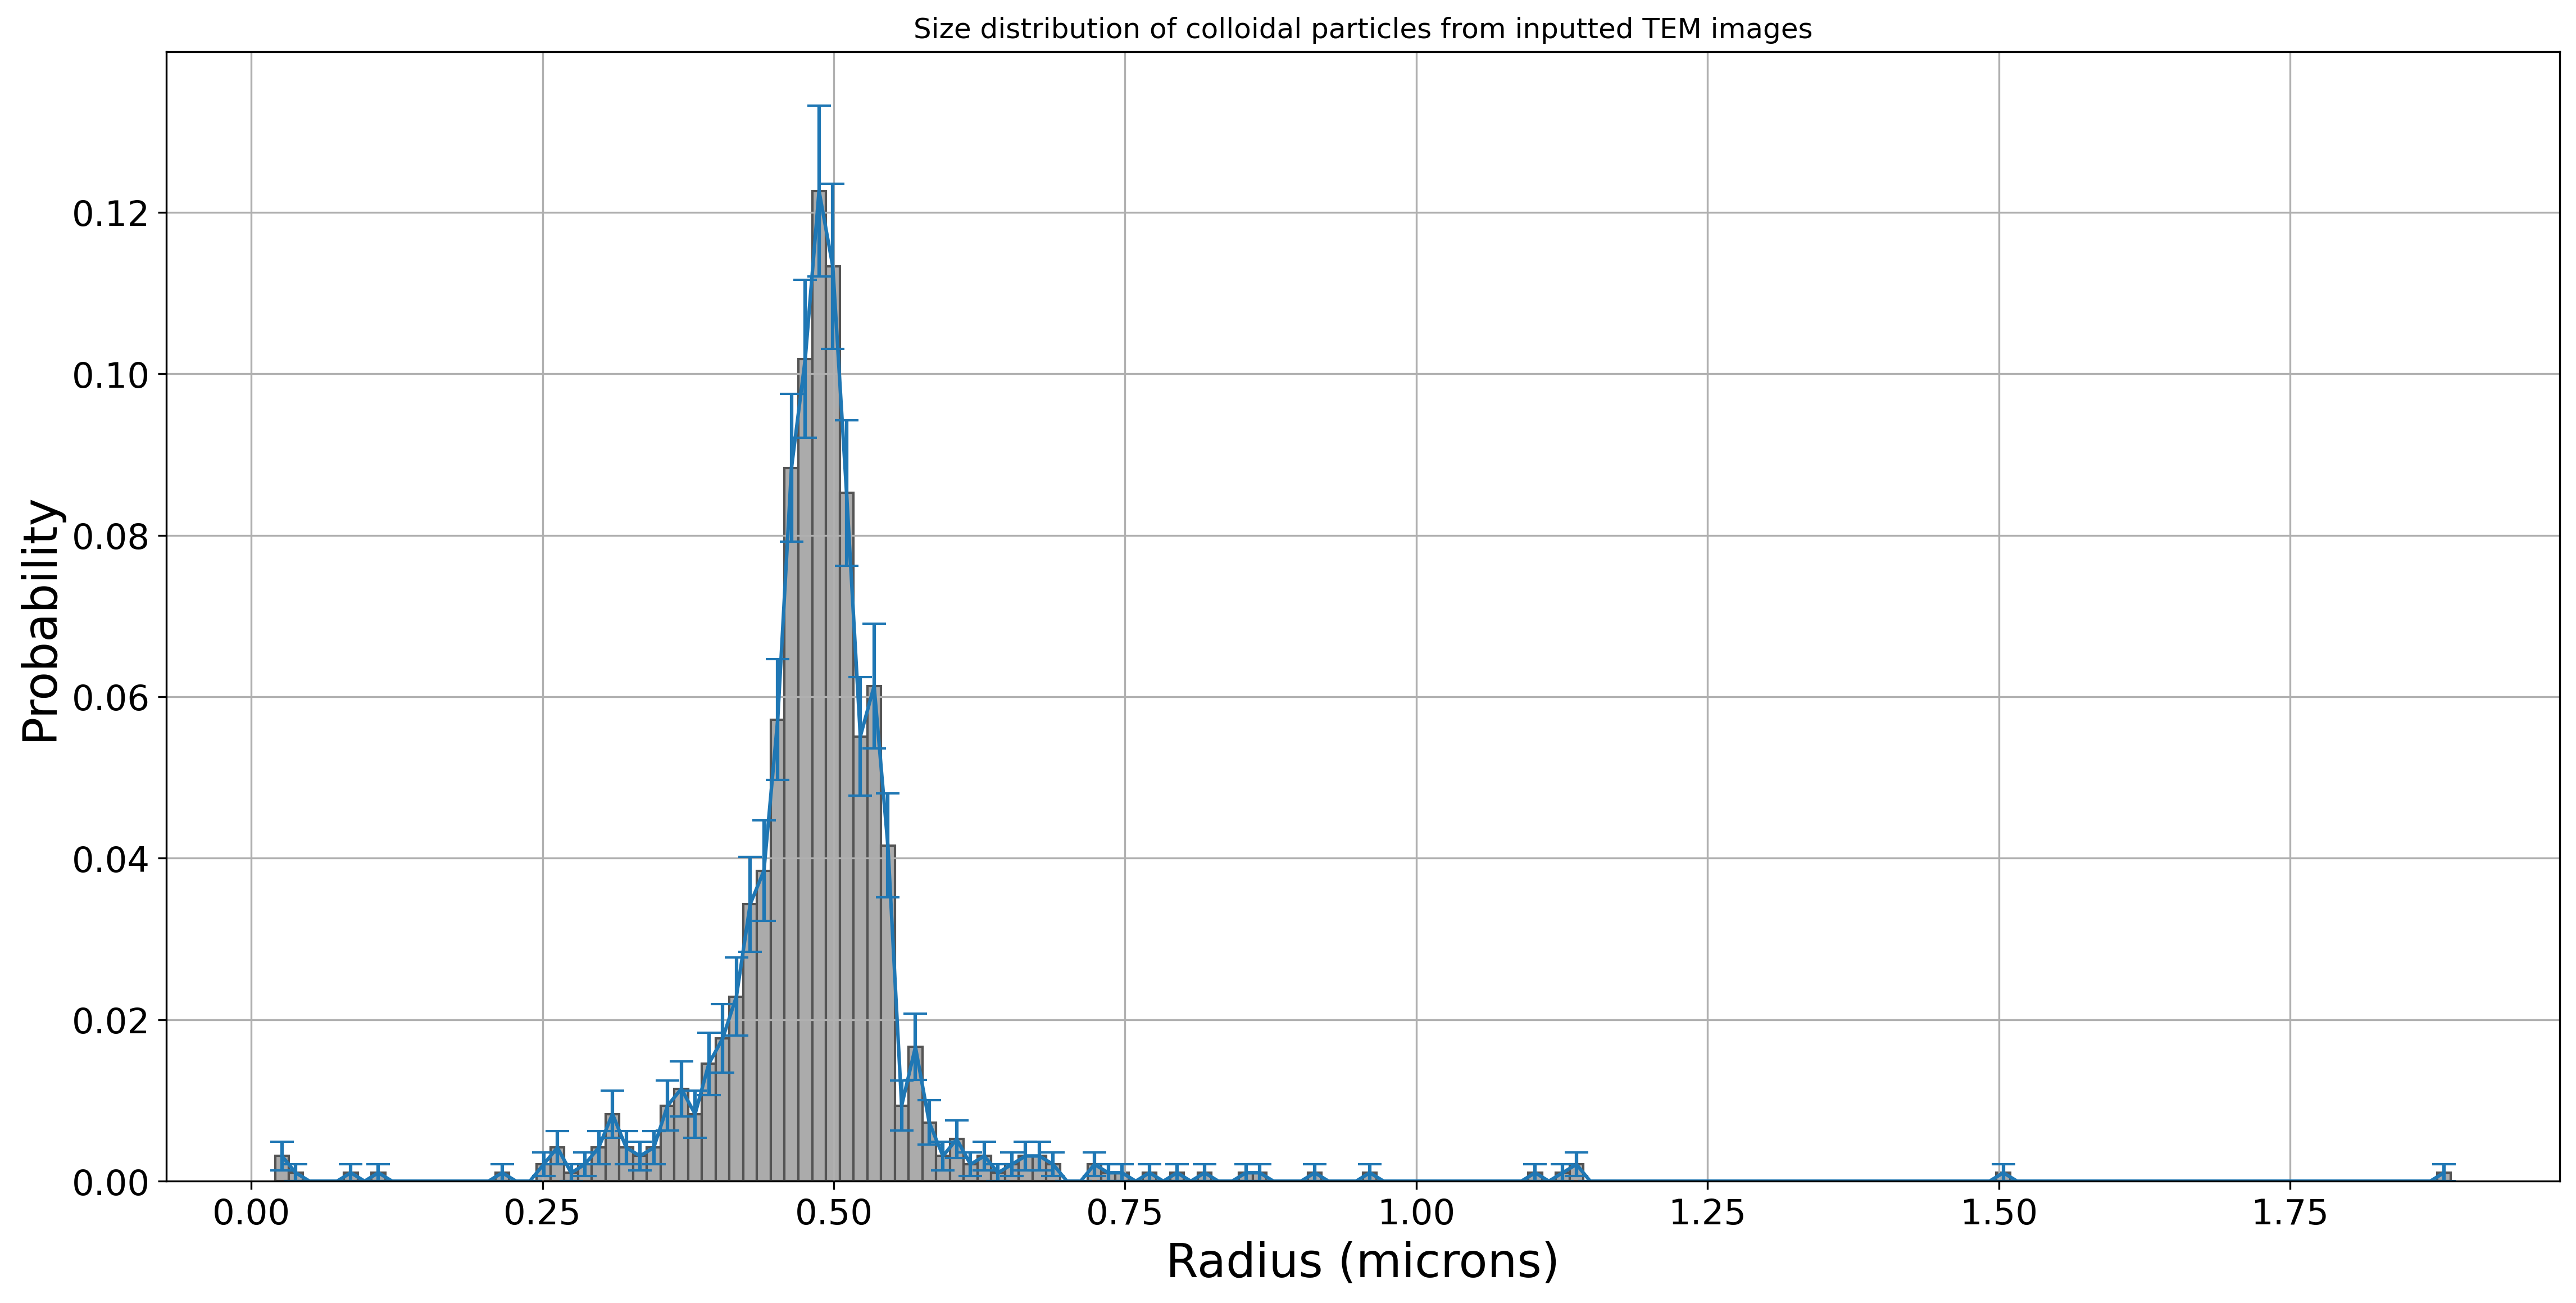

In [814]:
#Importing required packages
print("Importing required packages.")
from math import pi, sqrt
from numpy import linspace, sum, histogram, exp
import matplotlib.pyplot as plt

#Function for making and displaying the histogram
def hist_maker(data) :
    # Plot data in histogram
    print("Plotting data.")

    #Make graph using subplots
    fig = plt.figure(figsize=(20,10),dpi=300)
    ax  = fig.add_subplot(1,1,1) 
    plt.rc("font", size=10)
    plt.xlabel("Radius (microns)", size=20)
    plt.ylabel("Probability", size=20)
    plt.title("Size distribution of colloidal particles from inputted TEM images")
    plt.subplots_adjust(bottom=0.21, left=0.19)
    plt.grid()
    
    #Make (normalised) histogram and plot it.
    hist, bin_edges = histogram(data, bins='auto', density=True)
    num_of_bins = len(hist)
    
    hist_norm = hist/hist.sum()
    widths = bin_edges[:-1] - bin_edges[1:]
    plt.bar(bin_edges[1:], hist_norm, width=widths, color="0.67", edgecolor="0.33")
    print("Constructing histogram for overplotting with errors and curve fitting.")

    return hist_norm, bin_edges

hist_norm, bin_edges_norm = hist_maker(all_radii)

#Function for the errors on this histogram
def hist_errors(data, hist, bin_edges):
    
    #Making list of centermost values of the bins
    rad_cen = []
    for i in range(0,len(bin_edges)-1):
            rl     = bin_edges[i]
            dr     = bin_edges[i+1]-rl
            cr     = rl+dr #Note: used to be rl+0.5dr but for some reason it shifted so it's been removed
            rad_cen.append(cr)

    #Making the list of relative frequency errors
    rel_freq_err = []
    for i in range(0,len(rad_cen)):
        pt = hist[i]
        rel_err_temp = (1/sqrt(len(data)))*sqrt(pt*(1.0-pt))
        rel_freq_err.append(rel_err_temp)
        
    #Plotting the errorbars 
    plt.errorbar(rad_cen, hist, yerr=rel_freq_err, capsize=5)
    
    #Return the bin centers and their errors
    return rad_cen, rel_freq_err

rad_cen, rel_freq_err = hist_errors(all_radii, hist_norm, bin_edges_norm)

# Rejecting Outliers         *(mainly due to particle identification faults)*

It is expected some errors/outliers will be present from faulty particle identification.
From inspection of the above plot, you may now provide a cut-off point for which radii are not counted.
You may use the images from above to determine which radii are errors and which are genuine, if you please.
Provide your lower-boundary cut-off point, if you want none then leave blank and submit: 0.2
And now the upper-boundary cut-off point: 0.7
Thus your reduced histogram is given below.
If you are disssatisfied with your choice of range, feel free to re-run this cell and choose new values.
Plotting data.
Constructing histogram for overplotting with errors and curve fitting.


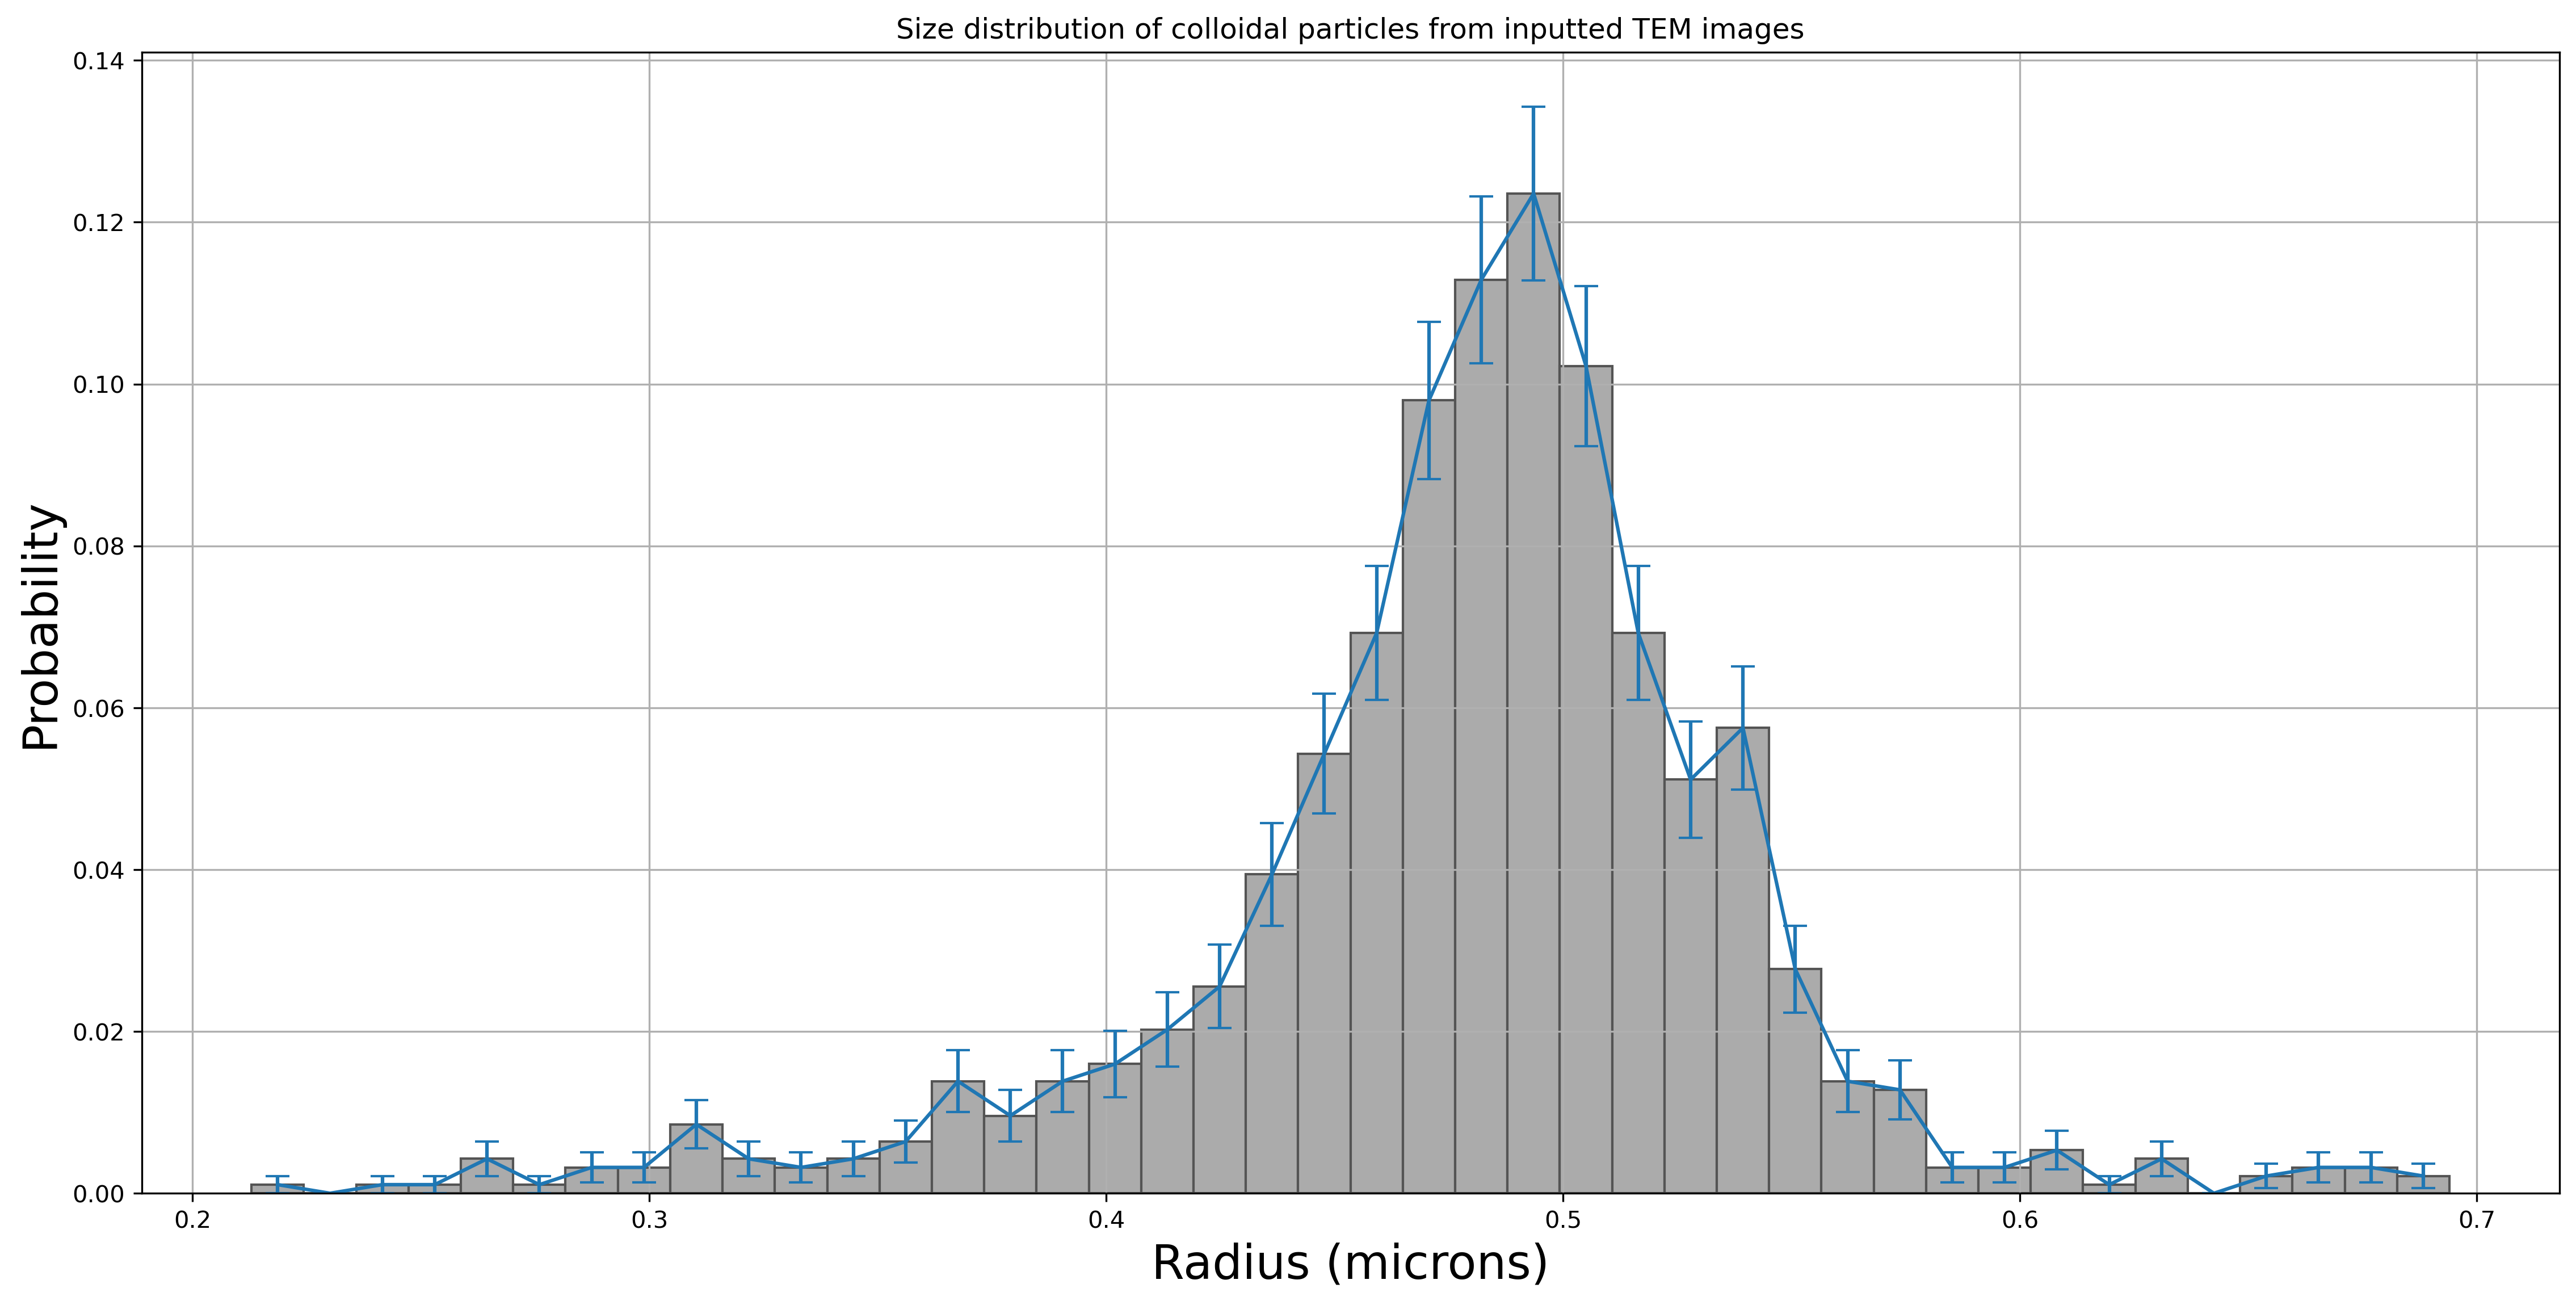

In [815]:
#Asks the user for a cut-off point and applies it to dataset
def cut_off_func(data):
    #Explain the purpose of this part to the user, justifies the requirement for user input
    print("It is expected some errors/outliers will be present from faulty particle identification.")
    print("From inspection of the above plot, you may now provide a cut-off point for which radii are not counted.")
    print("You may use the images from above to determine which radii are errors and which are genuine, if you please.")
    
    #First, the lower cut-off point
    cutoff_lower = input("Provide your lower-boundary cut-off point, if you want none then leave blank and submit: ")
    
    #Remove values below this lower cut-off point
    if cutoff_lower:
        data_new = np.delete(data, np.argwhere(data < float(cutoff_lower)))
    else:
        data_new = data
        
    #Second, the upper cut-off point
    cutoff_upper = input("And now the upper-boundary cut-off point: ")
    
    #Remove values above this upper cut-off point
    if cutoff_upper:
        data_new2 = np.delete(data_new, np.argwhere(data_new > float(cutoff_upper)))
    else:
        data_new2 = data_new
    return data_new2

all_radii_new = cut_off_func(all_radii)

#Presenting the new reduced histogram
print("Thus your reduced histogram is given below.")
print("If you are disssatisfied with your choice of range, feel free to re-run this cell and choose new values.")
hist_norm_new, bin_edges_new = hist_maker(all_radii_new)
rad_cen_new, rel_freq_err_new = hist_errors(all_radii_new, hist_norm_new, bin_edges_new)



# Gaussian Fitting

Plotting data.
Constructing histogram for overplotting with errors and curve fitting.
Defining Gaussian function for fitting.
The numpy.median for the array of rad_cen_new is 0.4534793086239345 and the numpy.std is 0.1388480927711367
The optimised values for x_0 and sigma and amplitude are 0.4888257483399092, 0.037202166835438005, 0.010252814440403345
Overplot fit onto data.
rmin and rmax are: 0.22841058049184315, 0.7492409161879753
Calculate normalised residuals.
Regular chi-squared for the Gaussian is: 106.03217905319201 with d.o.f: 39
Reduced chi-squared for the Gaussian is: 2.7187738218767183


<ipython-input-849-4085762052a4>:49: RuntimeWarning: divide by zero encountered in double_scalars
  res = ((fk-dk)/sk)**2


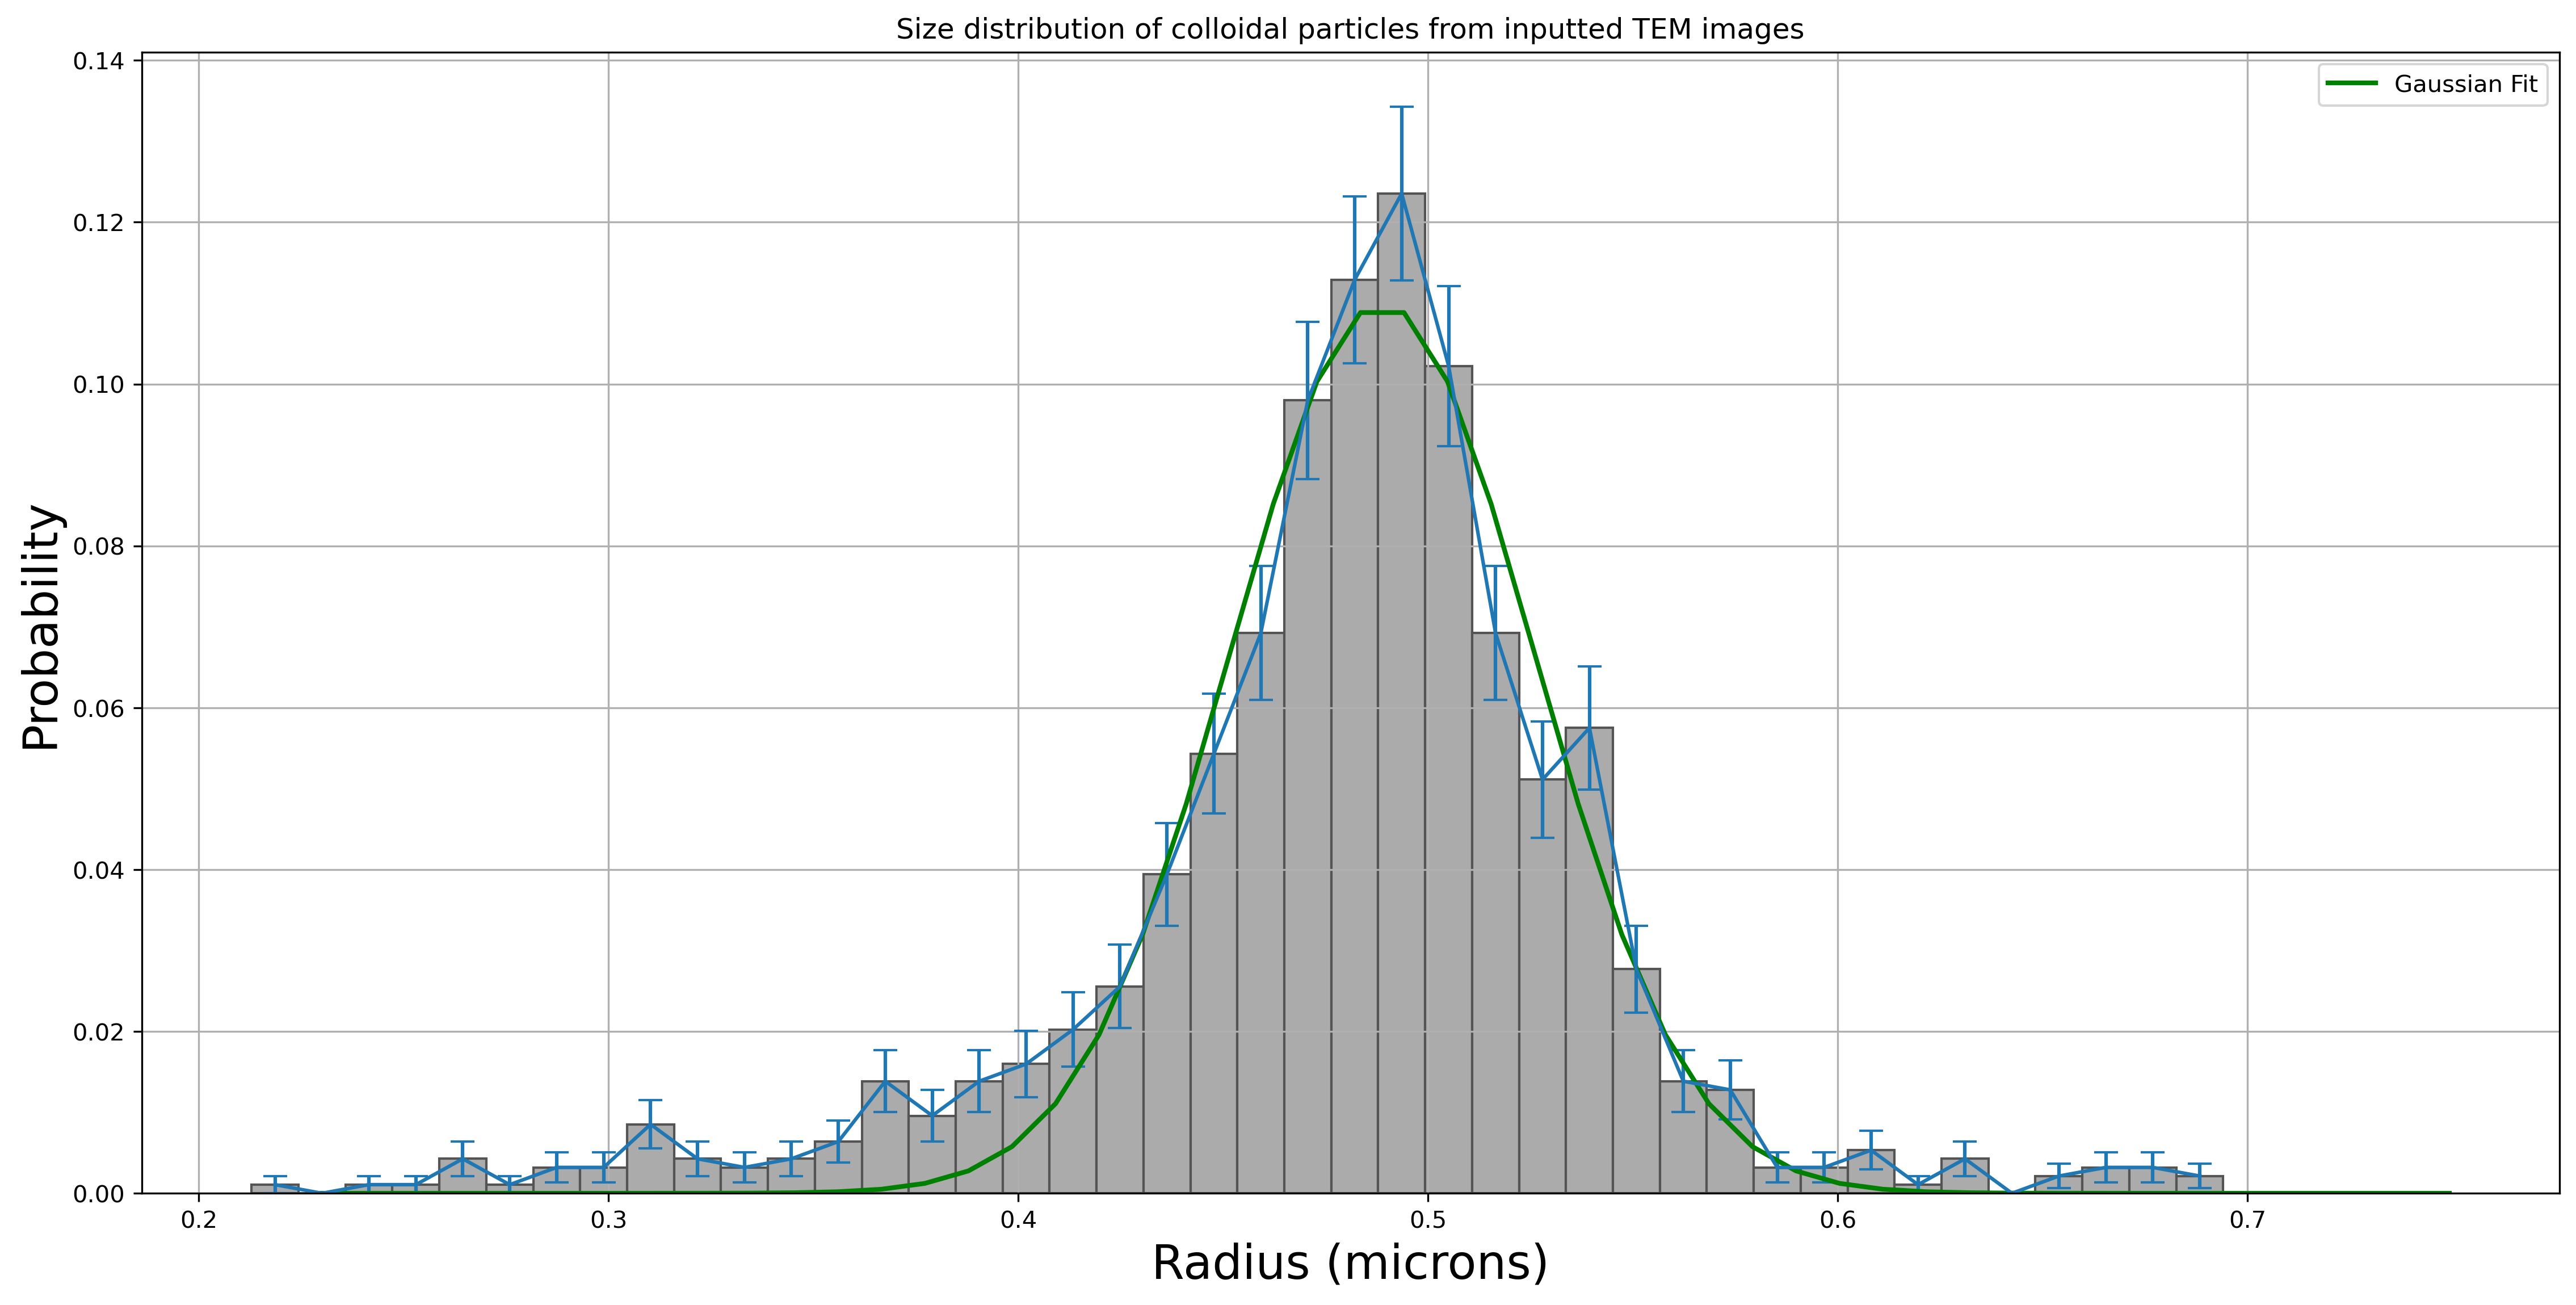

In [849]:
#Defining Gaussian Fitting function and applying it
#We are using curve_fit in this project for our fitting
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import math

#Plotting the histogram and the errors
hist_norm_new, bin_edges_new = hist_maker(all_radii_new)
rad_cen_new, rel_freq_err_new = hist_errors(all_radii_new, hist_norm_new, bin_edges_new)

#Define the Gaussian function itself
print("Defining Gaussian function for fitting.")
def gaussian(x,mu,sigma, A):
    return ((A/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2)))

#Defining the function that will do the fitting
def gaussian_fit(data, hist_norm_new):
    #Executing curve_fit and defining resultant optimised values
    popt, pcov = curve_fit(gaussian, rad_cen_new, hist_norm_new, p0=[np.mean(rad_cen_new), np.std(rad_cen_new), hist_norm_new.max()]) 
    average = popt[0]
    s = popt[1]
    A1 = popt[2]
    perr = np.sqrt(np.diag(pcov))
    
    #Printing the optimised values
    print("The numpy.median for the array of rad_cen_new is " + str(np.median(rad_cen_new)) + " and the numpy.std is " + str(np.std(rad_cen_new)))
    print("The optimised values for x_0 and sigma and amplitude are " + str(average) + ", " + str(s) + ", " + str(A1))
    
    #Define range of fit. Above/below 7 sigma confidence level both ways is negligilbe data.
    print("Overplot fit onto data.")
    rmin = average - 7.0*s
    rmax = average + 7.0*s
    print("rmin and rmax are: " + str(rmin) + ", " + str(rmax))

    #Plotting the Gaussian curve
    rf   = linspace(rmin,rmax)
    ff   = gaussian(rf,average,s, A1)
    plt.plot(rf, ff, ls="-", lw=2.0, color="g", label="Gaussian Fit")
    plt.legend()
    
    #Calculate residuals
    normres = []
    for i in range(0,len(rad_cen_new)):
            rad = rad_cen_new[i]        
            fk = gaussian(rad,average, s, A1)
            dk = hist_norm_new[i]
            sk = rel_freq_err_new[i]
            res = ((fk-dk)/sk)**2
            if math.isinf(res) == False:
                normres.append(res)
                
    #Calculating chi squaerd
    normchisq = sum(normres)
    
    #Calculating reduced chi squared
    dof = len(hist_norm_new)-len(popt)
    normchisq_red = normchisq / dof
    print("Regular chi-squared for the Gaussian is: " + str(normchisq) + " with d.o.f: " + str(dof))
    print("Reduced chi-squared for the Gaussian is: " + str(normchisq_red))

    
    return popt, perr, normchisq_red
popt_gau, perr_gau, chisq_gau = gaussian_fit(all_radii_new, hist_norm_new)

# Lorentzian Fitting

Plotting data.
Constructing histogram for overplotting with errors and curve fitting.
The numpy.median for the array of rad_cen_new is 0.4534793086239345 and the numpy.std is 0.1388480927711367
The optimised values for x_0 and sigma and amplitude are 0.4888257483399092, 0.037202166835438005, 0.010252814440403345
Overplot fit onto data.
rmin and rmax are: 0.22841058049184315, 0.7492409161879753
Calculate normalised residuals.
Regular chi-squared for the Gaussian is: 106.03217905319201 with d.o.f: 39
Reduced chi-squared for the Gaussian is: 2.7187738218767183
The numpy.mean for the array of rad_cen is 0.45347930862393443 and the numpy.std is 0.1388480927711367
x_0 and gamma and B1 are 0.4887508810923304, 0.033806137145754464, 0.01309382727701862
Overplot fit onto data.
rmin and rmax are: 0.2877802144084397, 0.6897215477762211
Calculate normalised residuals.
Regular chi-squared for the Lorentzian is: 124.82907307376932 with d.o.f: 39
Reduced chi-squared for the Lorentzian is: 3.2007454634

<ipython-input-849-4085762052a4>:49: RuntimeWarning: divide by zero encountered in double_scalars
  res = ((fk-dk)/sk)**2
<ipython-input-850-e149046e0384>:50: RuntimeWarning: divide by zero encountered in double_scalars
  res = ((fk-dk)/sk)**2


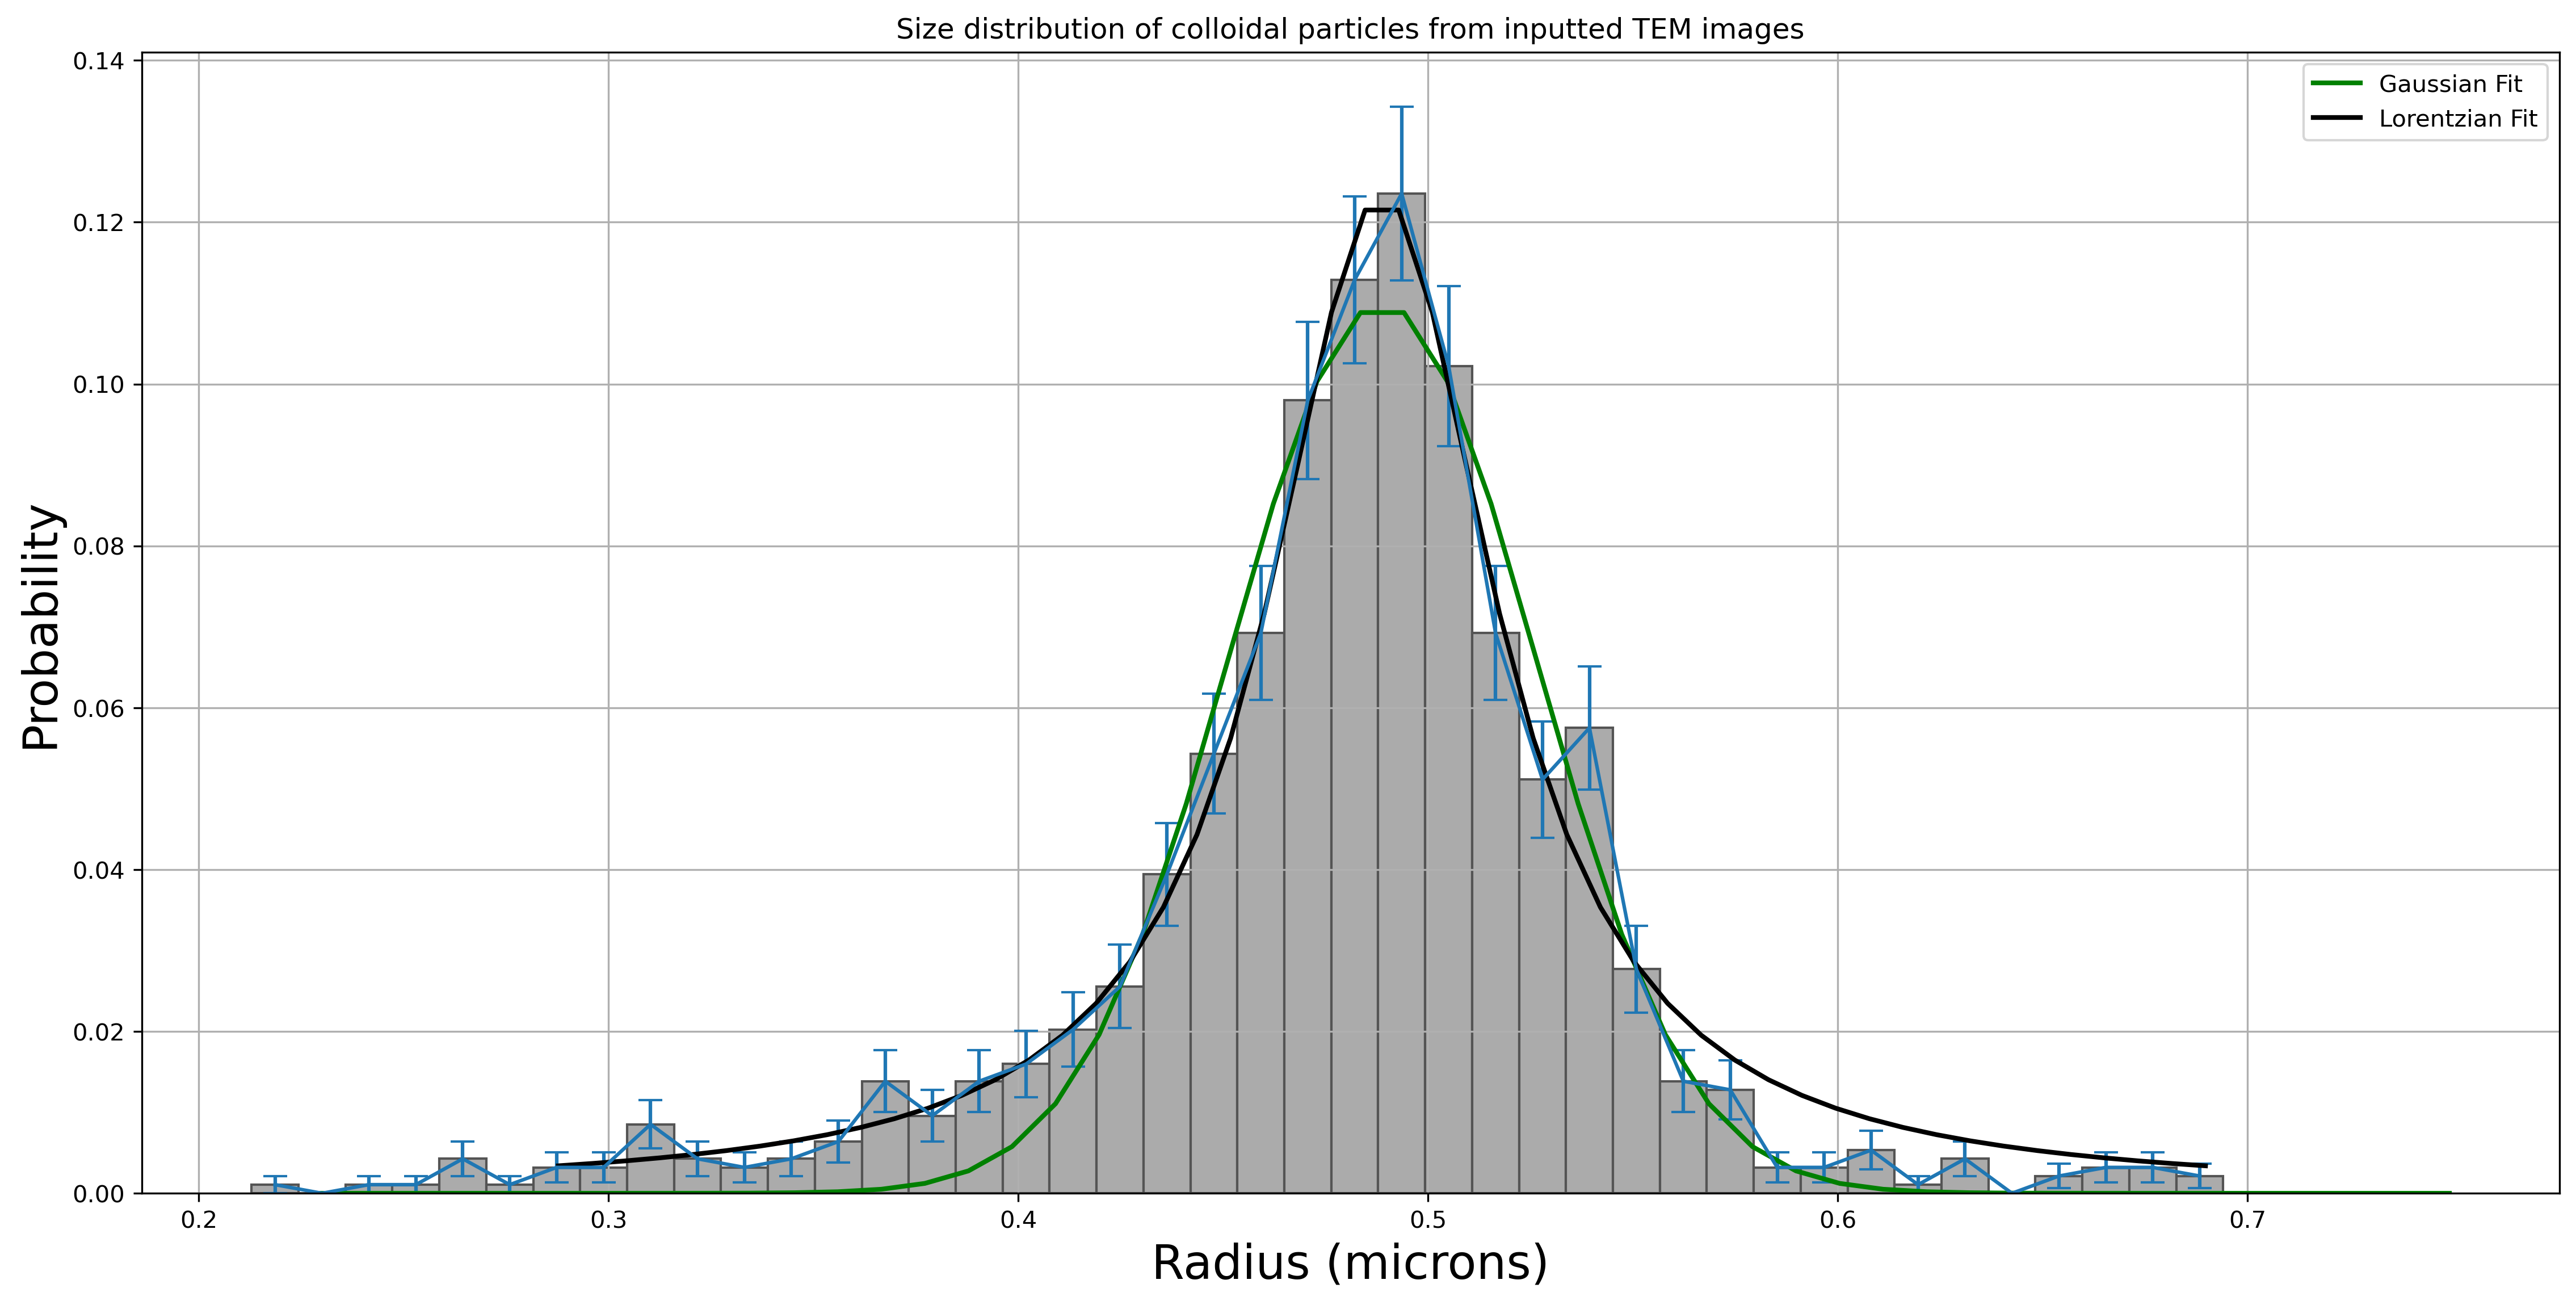

In [850]:
#Defining the Lorentzian fitting function and applying

#Plotting the histogram and errors
hist_norm_new, bin_edges_new = hist_maker(all_radii_new)
rad_cen_new, rel_freq_err_new = hist_errors(all_radii_new, hist_norm_new, bin_edges_new)

#Defining the actual Lorentzian function
def lorentzian(x, x_0, gamma, B):
    return (B/(np.pi*gamma*(1+((x-x_0)/gamma)**2)))

#The function for fitting the Lorentzian and plotting
def lorentzian_fit(data, hist_norm_new):
    
    #Executing curve_fit function
    popt, pcov = curve_fit(lorentzian, rad_cen_new, hist_norm_new, p0=[np.mean(rad_cen_new),np.std(rad_cen_new), hist_norm_new.max()])
    
    #Finding the curvefit values for the optimised values
    x_0_cf = popt[0]
    gamma_cf = popt[1]   
    B1 = popt[2]
    perr = np.sqrt(np.diag(pcov))
    
    #Printing regular np.mean and np.std values as well as found values
    print("The numpy.mean for the array of rad_cen is " + str(np.mean(rad_cen_new)) + " and the numpy.std is " + str(np.std(rad_cen_new)))
    print("x_0 and gamma and B1 are " + str(x_0_cf) + ", " + str(gamma_cf) + ", " + str(B1))
    
    
    #Define range of fit. Same justification for ±7sigma is for Gaussian.
    # Convert gamma (HWHM) into sigma here by dividing by 1.1775 (a known relationship) to keep range consistent
    print("Overplot fit onto data.")
    rmin = x_0_cf - 7.0*gamma_cf/1.1775
    rmax = x_0_cf + 7.0*gamma_cf/1.1775

    print("rmin and rmax are: " + str(rmin) + ", " + str(rmax))

    #Plotting the Lorentzian fit with appropriate range
    rf   = linspace(rmin,rmax)
    ff   = lorentzian(rf,x_0_cf,gamma_cf, B1)
    plt.plot(rf, ff, ls="-", lw=2.0, color="0", label="Lorentzian Fit")
    plt.legend()

    #Calculate residuals
    normres = []
    for i in range(0,len(rad_cen_new)):
            rad = rad_cen_new[i]        
            fk = lorentzian(rad, x_0_cf, gamma_cf, B1)
            dk = hist_norm_new[i]
            sk = rel_freq_err_new[i]
            res = ((fk-dk)/sk)**2
            if math.isinf(res) == False:
                normres.append(res)
                
    #Calculating chi squared and reduced chi squared
    normchisq = sum(normres)
    dof = len(hist_norm_new)-len(popt)
    print("Regular chi-squared for the Lorentzian is: " + str(normchisq) + " with d.o.f: " + str(dof))
    normchisq_red = normchisq / dof
    print("Reduced chi-squared for the Lorentzian is: " + str(normchisq_red))
    
    return popt, perr, normchisq_red

popt_gau, perr_gau, chisq_gau = gaussian_fit(all_radii_new, hist_norm_new)
popt_lor, perr_lor, chisq_lor = lorentzian_fit(all_radii_new, hist_norm_new)


# Residual for Gaussian

In [818]:
#Replaces every 0 with 'nan' and returns a copy for negligibly small values (converged on by trial and error)
#Makes plotting the residuals neater, if used. Not actually used for plotting here, for sake of transparency. 
def zero_to_nan(values):
    return [float('nan') if (-1*10**(-4))<x<(1*10**(-4)) else x for x in values]

<ipython-input-819-d00ffe73a11b>:6: RuntimeWarning: invalid value encountered in true_divide
  res_errors = r_gau * np.sqrt( ( rel_freq_err_new / hist_norm_new )**2 + ( gaussian(rad_cen_new, *popt_gau) / np.std(gaussian(rad_cen_new, *popt_gau)) )**2 )
<ipython-input-819-d00ffe73a11b>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


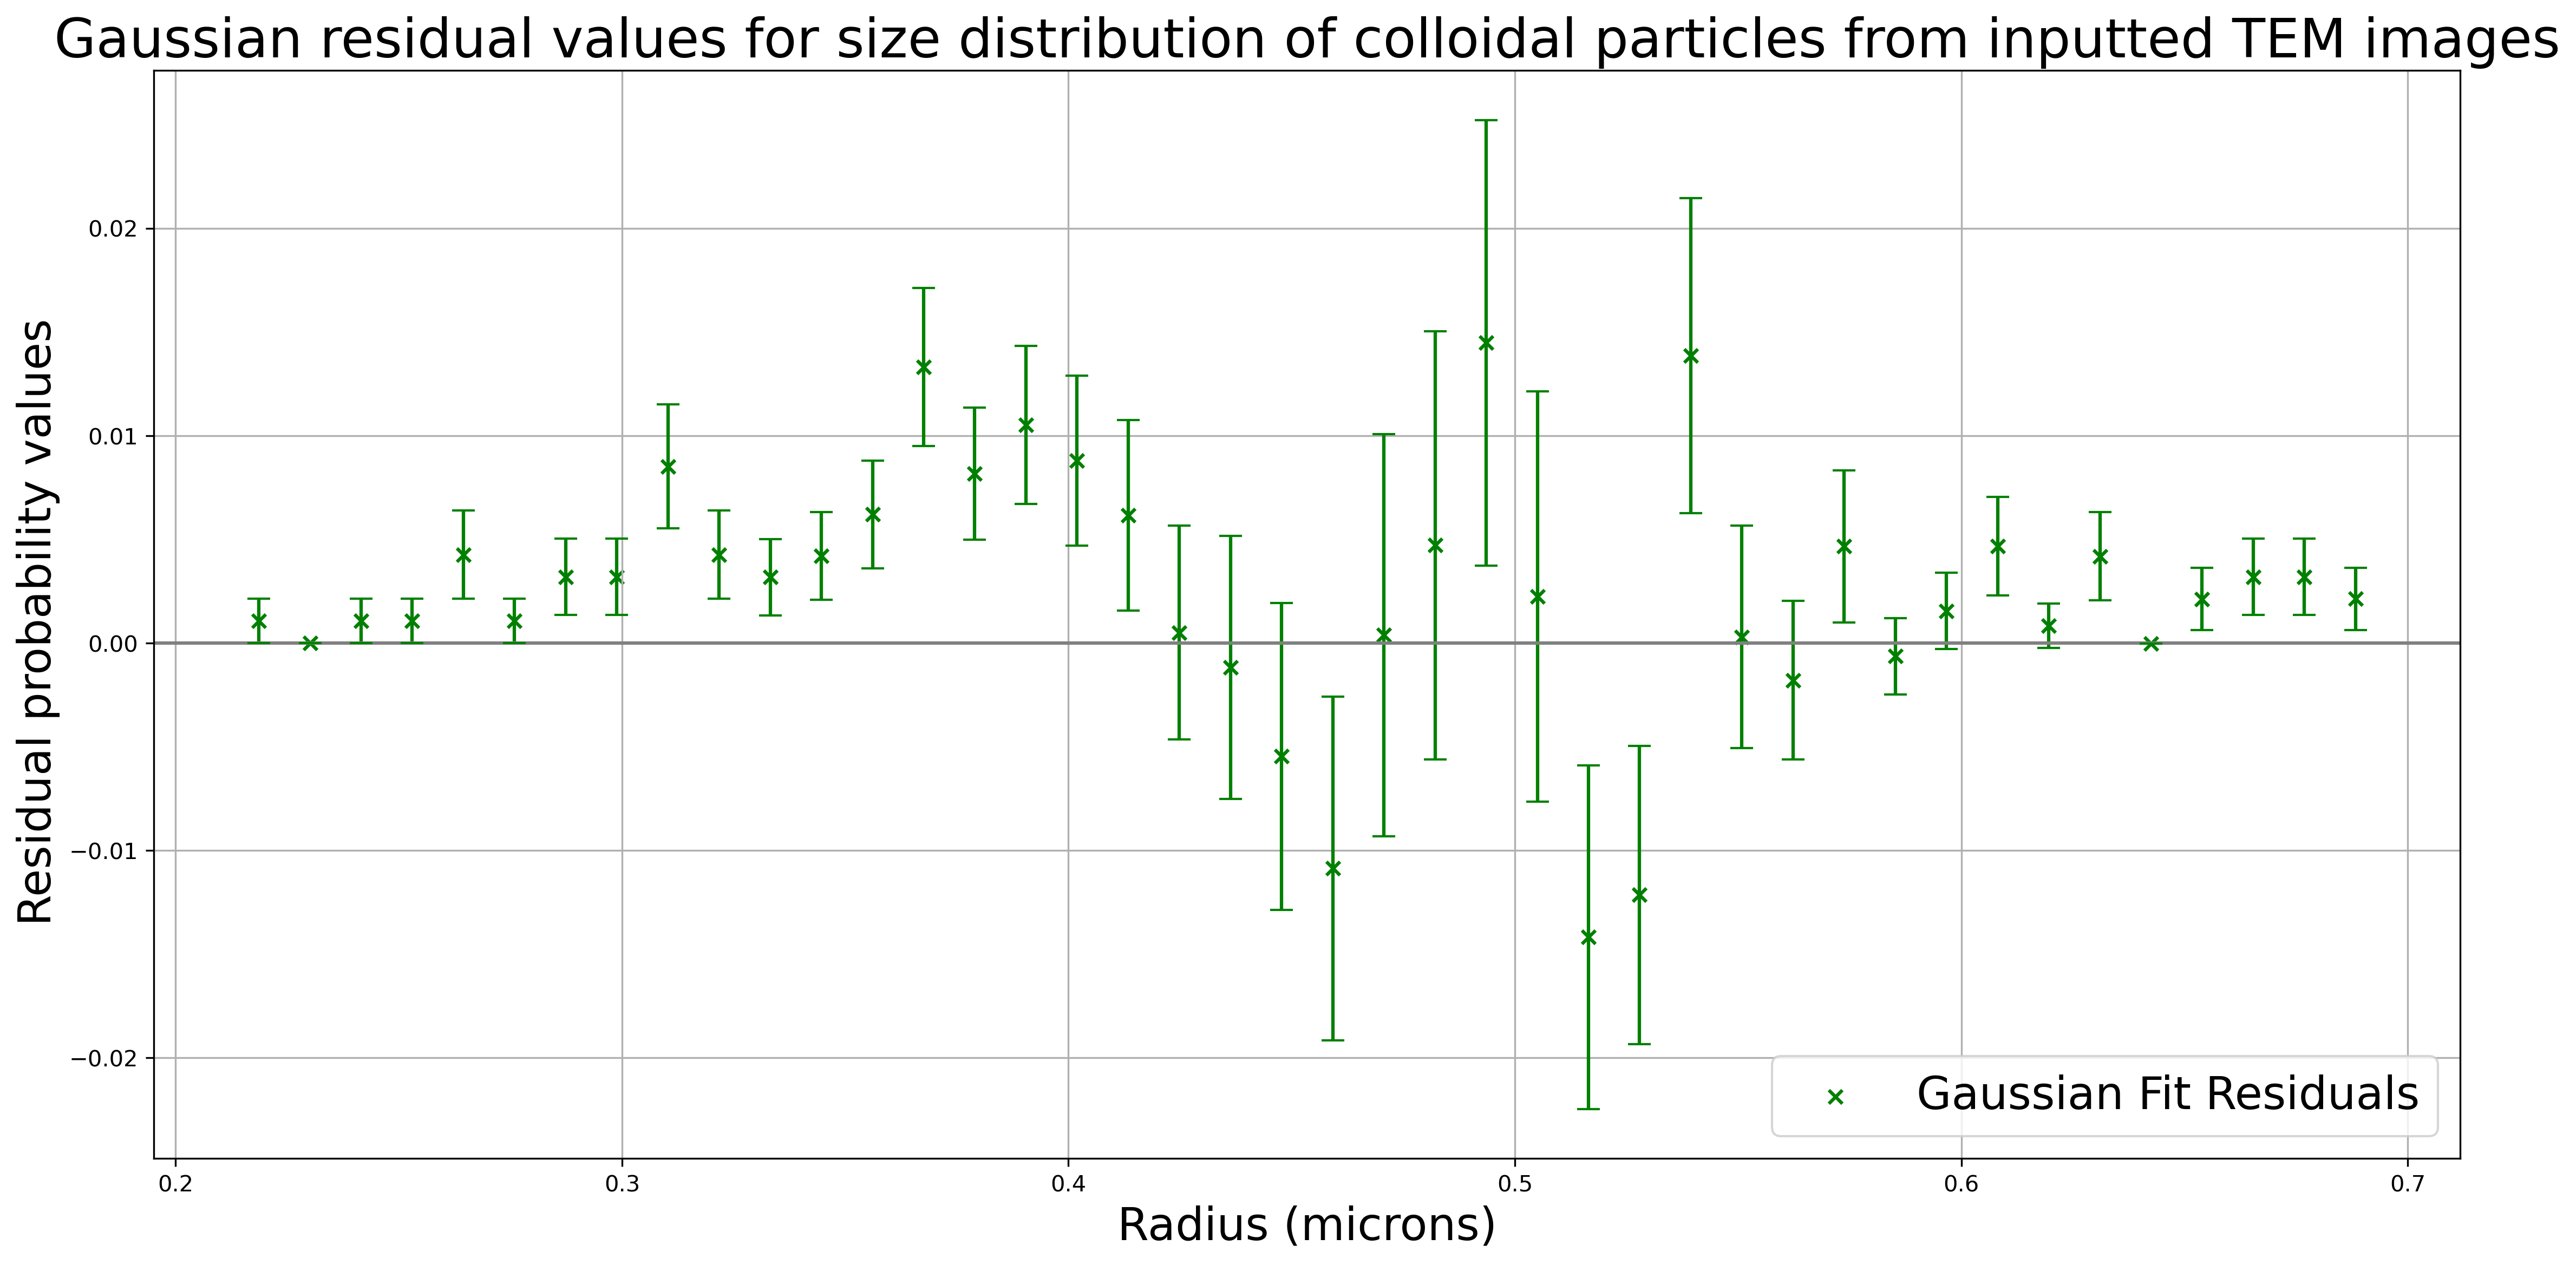

In [819]:
#Defining the Gaussian residuals
r_gau = hist_norm_new - gaussian(rad_cen_new, *popt_gau)
r_gau_nozero = zero_to_nan(r_gau)

#Creating the subplot with x-axis displayed
fig = plt.figure(figsize=(20,10), dpi=300)
ax  = fig.add_subplot(1,1,1) 
ax.axhline(y=0, color='gray')
   
#Plotting relevant residuals values with errors
plt.rc("font", size=20)
plt.xlabel("Radius (microns)", size=20)
plt.ylabel("Residual probability values ", size=20)
plt.title("Gaussian residual values for size distribution of colloidal particles from inputted TEM images")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.scatter(rad_cen_new, r_gau, color="g", label="Gaussian Fit Residuals", marker="x")
plt.errorbar(rad_cen_new, r_gau, yerr=rel_freq_err_new, xerr=None, capsize=5, color="g", ls='none') 
plt.axes()
plt.grid()
plt.legend(loc = 'lower right')
plt.show()


# Residual for Lorentzian

<ipython-input-820-a1481ef3e8b2>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


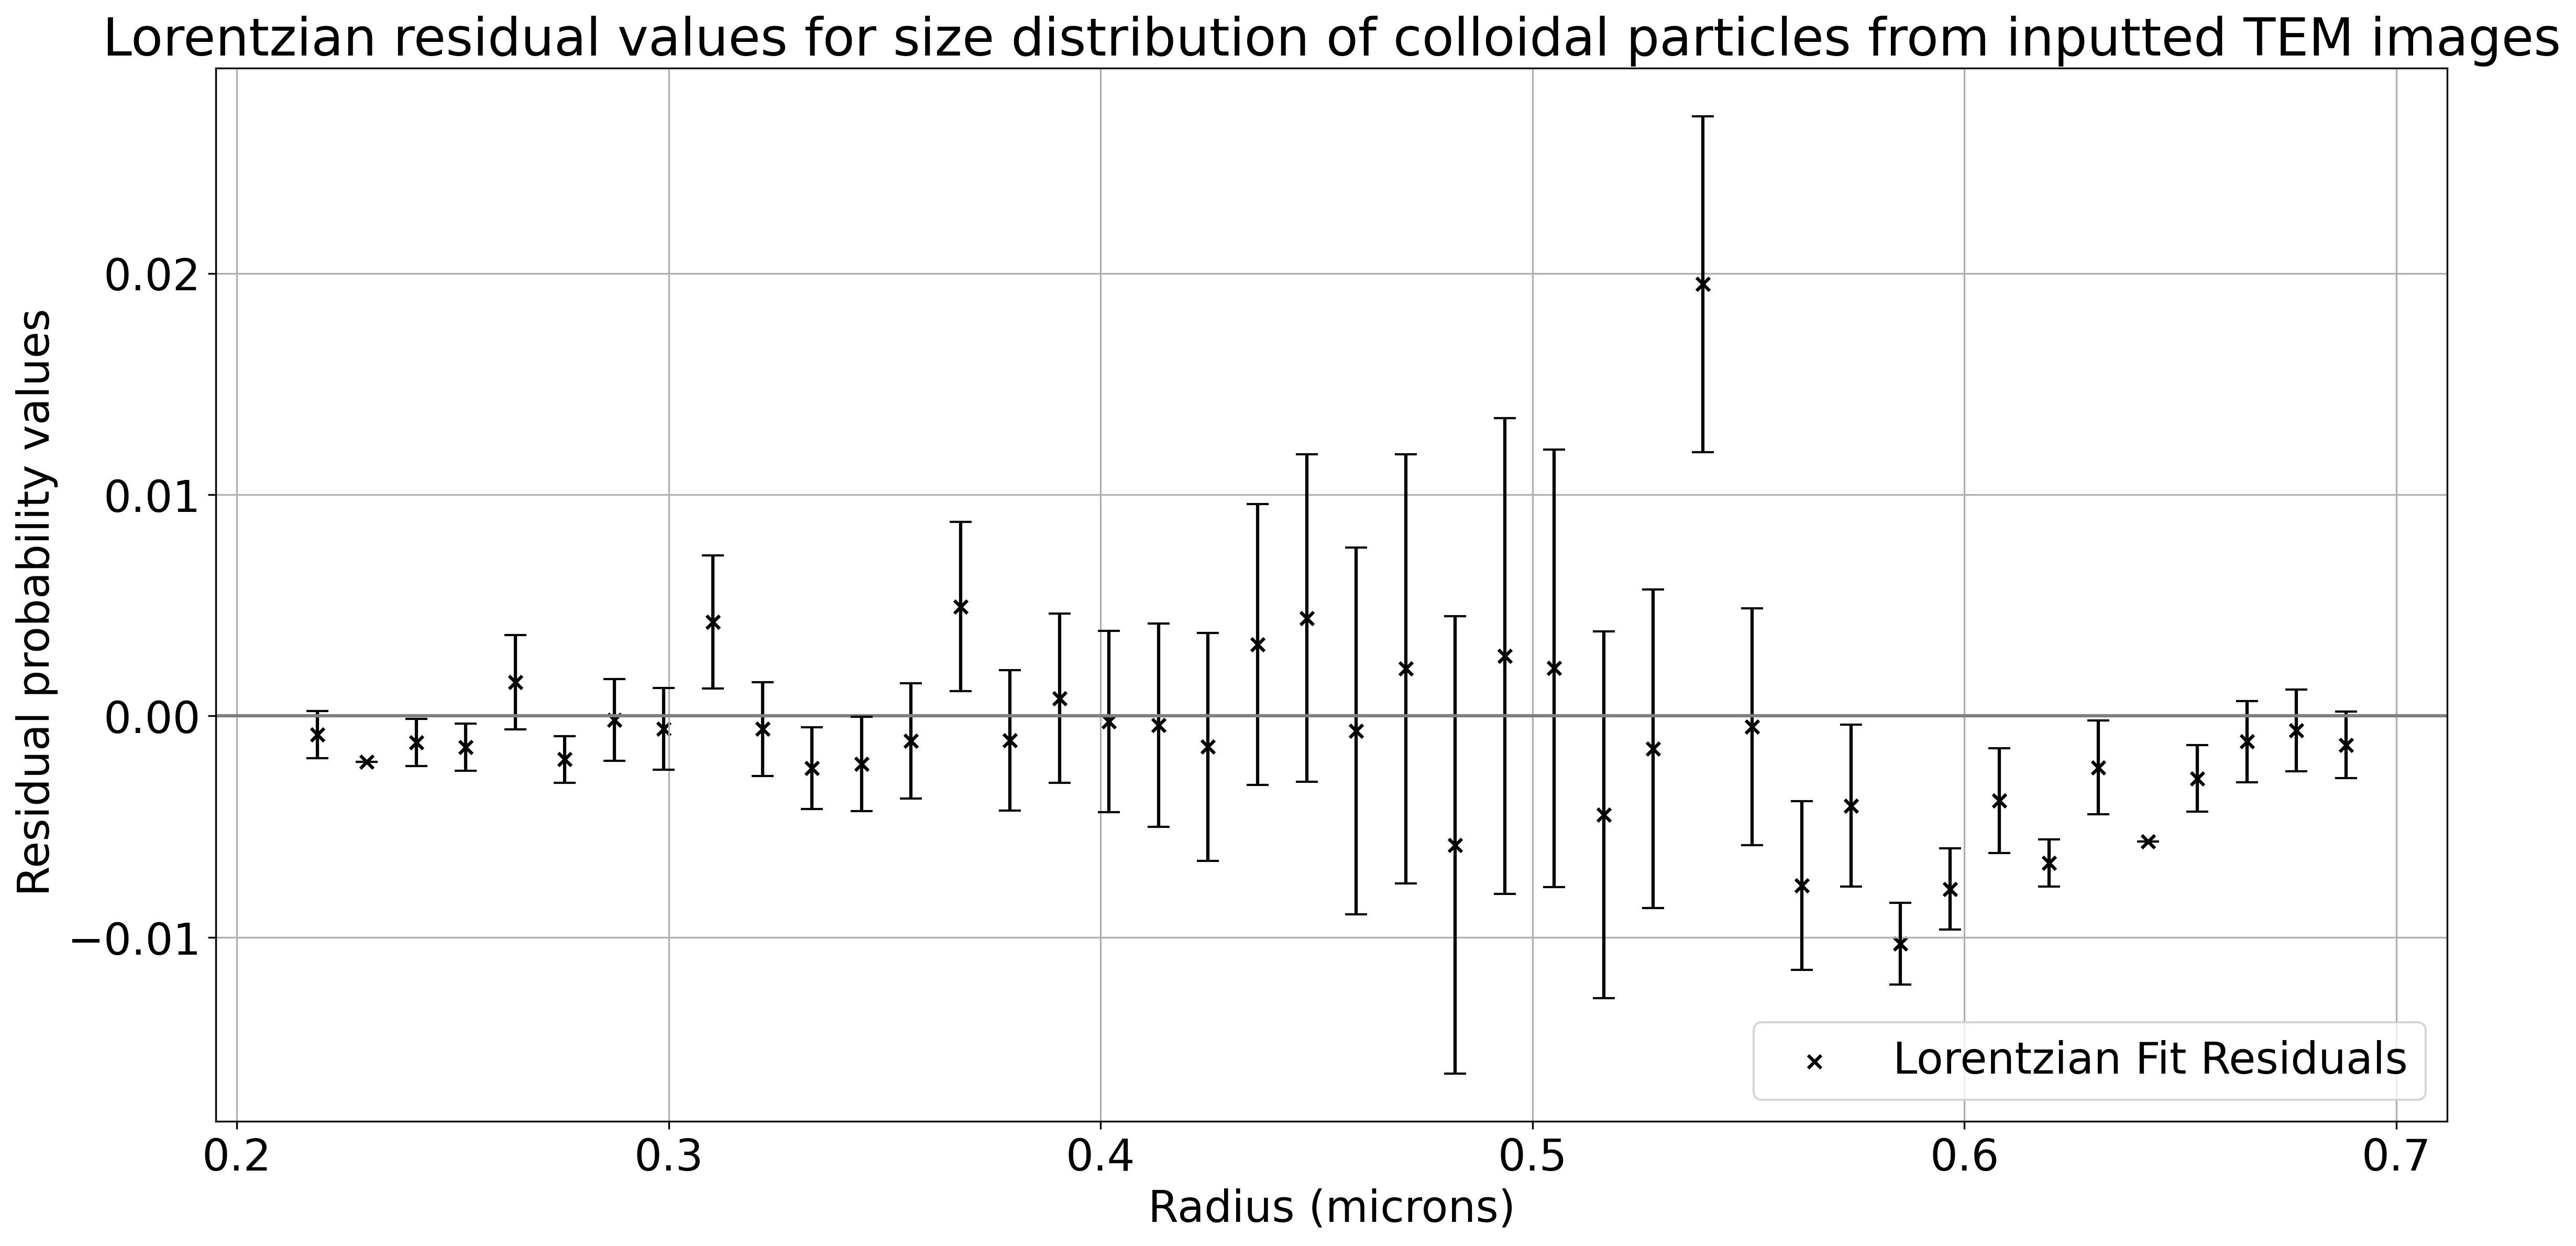

In [820]:
#Defining the Lorentzian residuals
r_lor = hist_norm_new - lorentzian(rad_cen_new, *popt_lor)
r_lor_nozero = zero_to_nan(r_lor)

#Creating subplots figure with visible x-axis 
fig = plt.figure(figsize=(20,10), dpi=300)
ax  = fig.add_subplot(1,1,1) 
ax.axhline(y=0, color='gray')

#Plotting relevant residuals values with errors
plt.rc("font", size=20)
plt.xlabel("Radius (microns)", size=20)
plt.ylabel("Residual probability values ", size=20)
plt.title("Lorentzian residual values for size distribution of colloidal particles from inputted TEM images")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.scatter(rad_cen_new, r_lor, color="0", label="Lorentzian Fit Residuals", marker='x')
plt.errorbar(rad_cen_new, r_lor, yerr=rel_freq_err_new, capsize=5, color="0", ls='none') 
plt.axes()
plt.grid()
plt.legend(loc = 'lower right')
plt.show()



# The Final Values

In [821]:
#Finding the curvefit values for average, s, and A1, and their errors, for the Gaussian
average = popt_gau[0]
s = popt_gau[1]
A1 = popt_gau[2]
average_err = perr_gau[0]
s_err = perr_gau[1]
A1_err = perr_gau[2]

#Printing these Gaussian curvefit values
print("\u0332".join("For Gaussian:"))
print("x_0 (mean) and standard deviation and A1 (amplitude) are ")
print(str(average) + ", " + str(s) + ", " + str(A1))
print("These have errors of                                                   ")
print(str(perr_gau[0]) + ", " + str(perr_gau[1]) + ", " + str(perr_gau[2]))
print() 

#Finding the curvefit values for x_0, gamma, and B1, and their errors, for the Lorentzian
x_0_cf = popt_lor[0]
gamma_cf = popt_lor[1]  
B1 = popt_lor[2]
x_0_cf_err = perr_gau[0]
gamma_cf_err = perr_gau[1]
B1_err = perr_gau[2]

#Printing these Lorentzian curvefit values
print("\u0332".join("For Lorentzian:"))
print("x_0 and gamma (HWHM) and B1 (amplitude) are ")
print(str(x_0_cf) + ", " + str(gamma_cf) + ", " + str(B1))
print("These have errors of                                        ")
print( str(perr_lor[0]) + ", " + str(perr_lor[1]) + ", " + str(perr_lor[2]))

print()

#Converting the Gaussian standard deviation to HWHM
gamma_gau = s/1.1775
gamma_gau_err = s_err/1.1775
print("Converting the standard deviation to HWHM by dividing by 1.1775 (known property) gives, for the Gaussian,")
print("HWHM of " + str(gamma_gau) + " with an error of " + str(gamma_gau_err))

print()
print("Note that we convert st dev to gamma (HWHM) for the sake of direct comparison with the Lorentzian")


F̲o̲r̲ ̲G̲a̲u̲s̲s̲i̲a̲n̲:
x_0 (mean) and standard deviation and A1 (amplitude) are 
0.4888257483399092, 0.037202166835438005, 0.010252814440403345
These have errors of                                                   
0.0013143755346198592, 0.0013143755636689037, 0.0003137090768803016

F̲o̲r̲ ̲L̲o̲r̲e̲n̲t̲z̲i̲a̲n̲:
x_0 and gamma (HWHM) and B1 (amplitude) are 
0.4887508810923304, 0.033806137145754464, 0.01309382727701862
These have errors of                                        
0.0008688607049480226, 0.0012357167586426524, 0.00033823255304145556

Converting the standard deviation to HWHM by dividing by 1.1775 (known property) gives, for the Gaussian,
HWHM of 0.03159419688784544 with an error of 0.0011162425169162664

Note that we convert st dev to gamma (HWHM) for the sake of direct comparison with the Lorentzian


# Plotting Changes in $x_0$ and $\gamma$ and $\chi^2_\text{r}$

In [822]:

#Creating a list of all important values we want to track, over many trials, by utilising a query format
query = input("Add to previous list? Answer [y]/[n]. If first time then write [n] ")
if query == "n":
    number = [1]
    
    x0G = [average]
    x0L = [x_0_cf]
    gammaG = [gamma_gau]
    gammaL = [gamma_cf]
    chisqG = [chisq_gau]
    chisqL = [chisq_lor]
    
    x0G_err = [average_err]
    x0L_err = [x_0_cf_err]
    gammaG_err = [gamma_gau_err]
    gammaL_err = [gamma_cf_err]
    
elif query == "y":
    number.append(number[-1]+1)
    
    x0G.append(average)
    x0L.append(x_0_cf)
    gammaG.append(gamma_gau)
    gammaL.append(gamma_cf)
    chisqG.append(chisq_gau)
    chisqL.append(chisq_lor)
    
    x0G_err.append(average_err)
    x0L_err.append(x_0_cf_err)
    gammaG_err.append(gamma_gau_err)
    gammaL_err.append(gamma_cf_err)

    

Add to previous list? Answer [y]/[n]. If first time then write [n] y


<ipython-input-833-371628b6672f>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


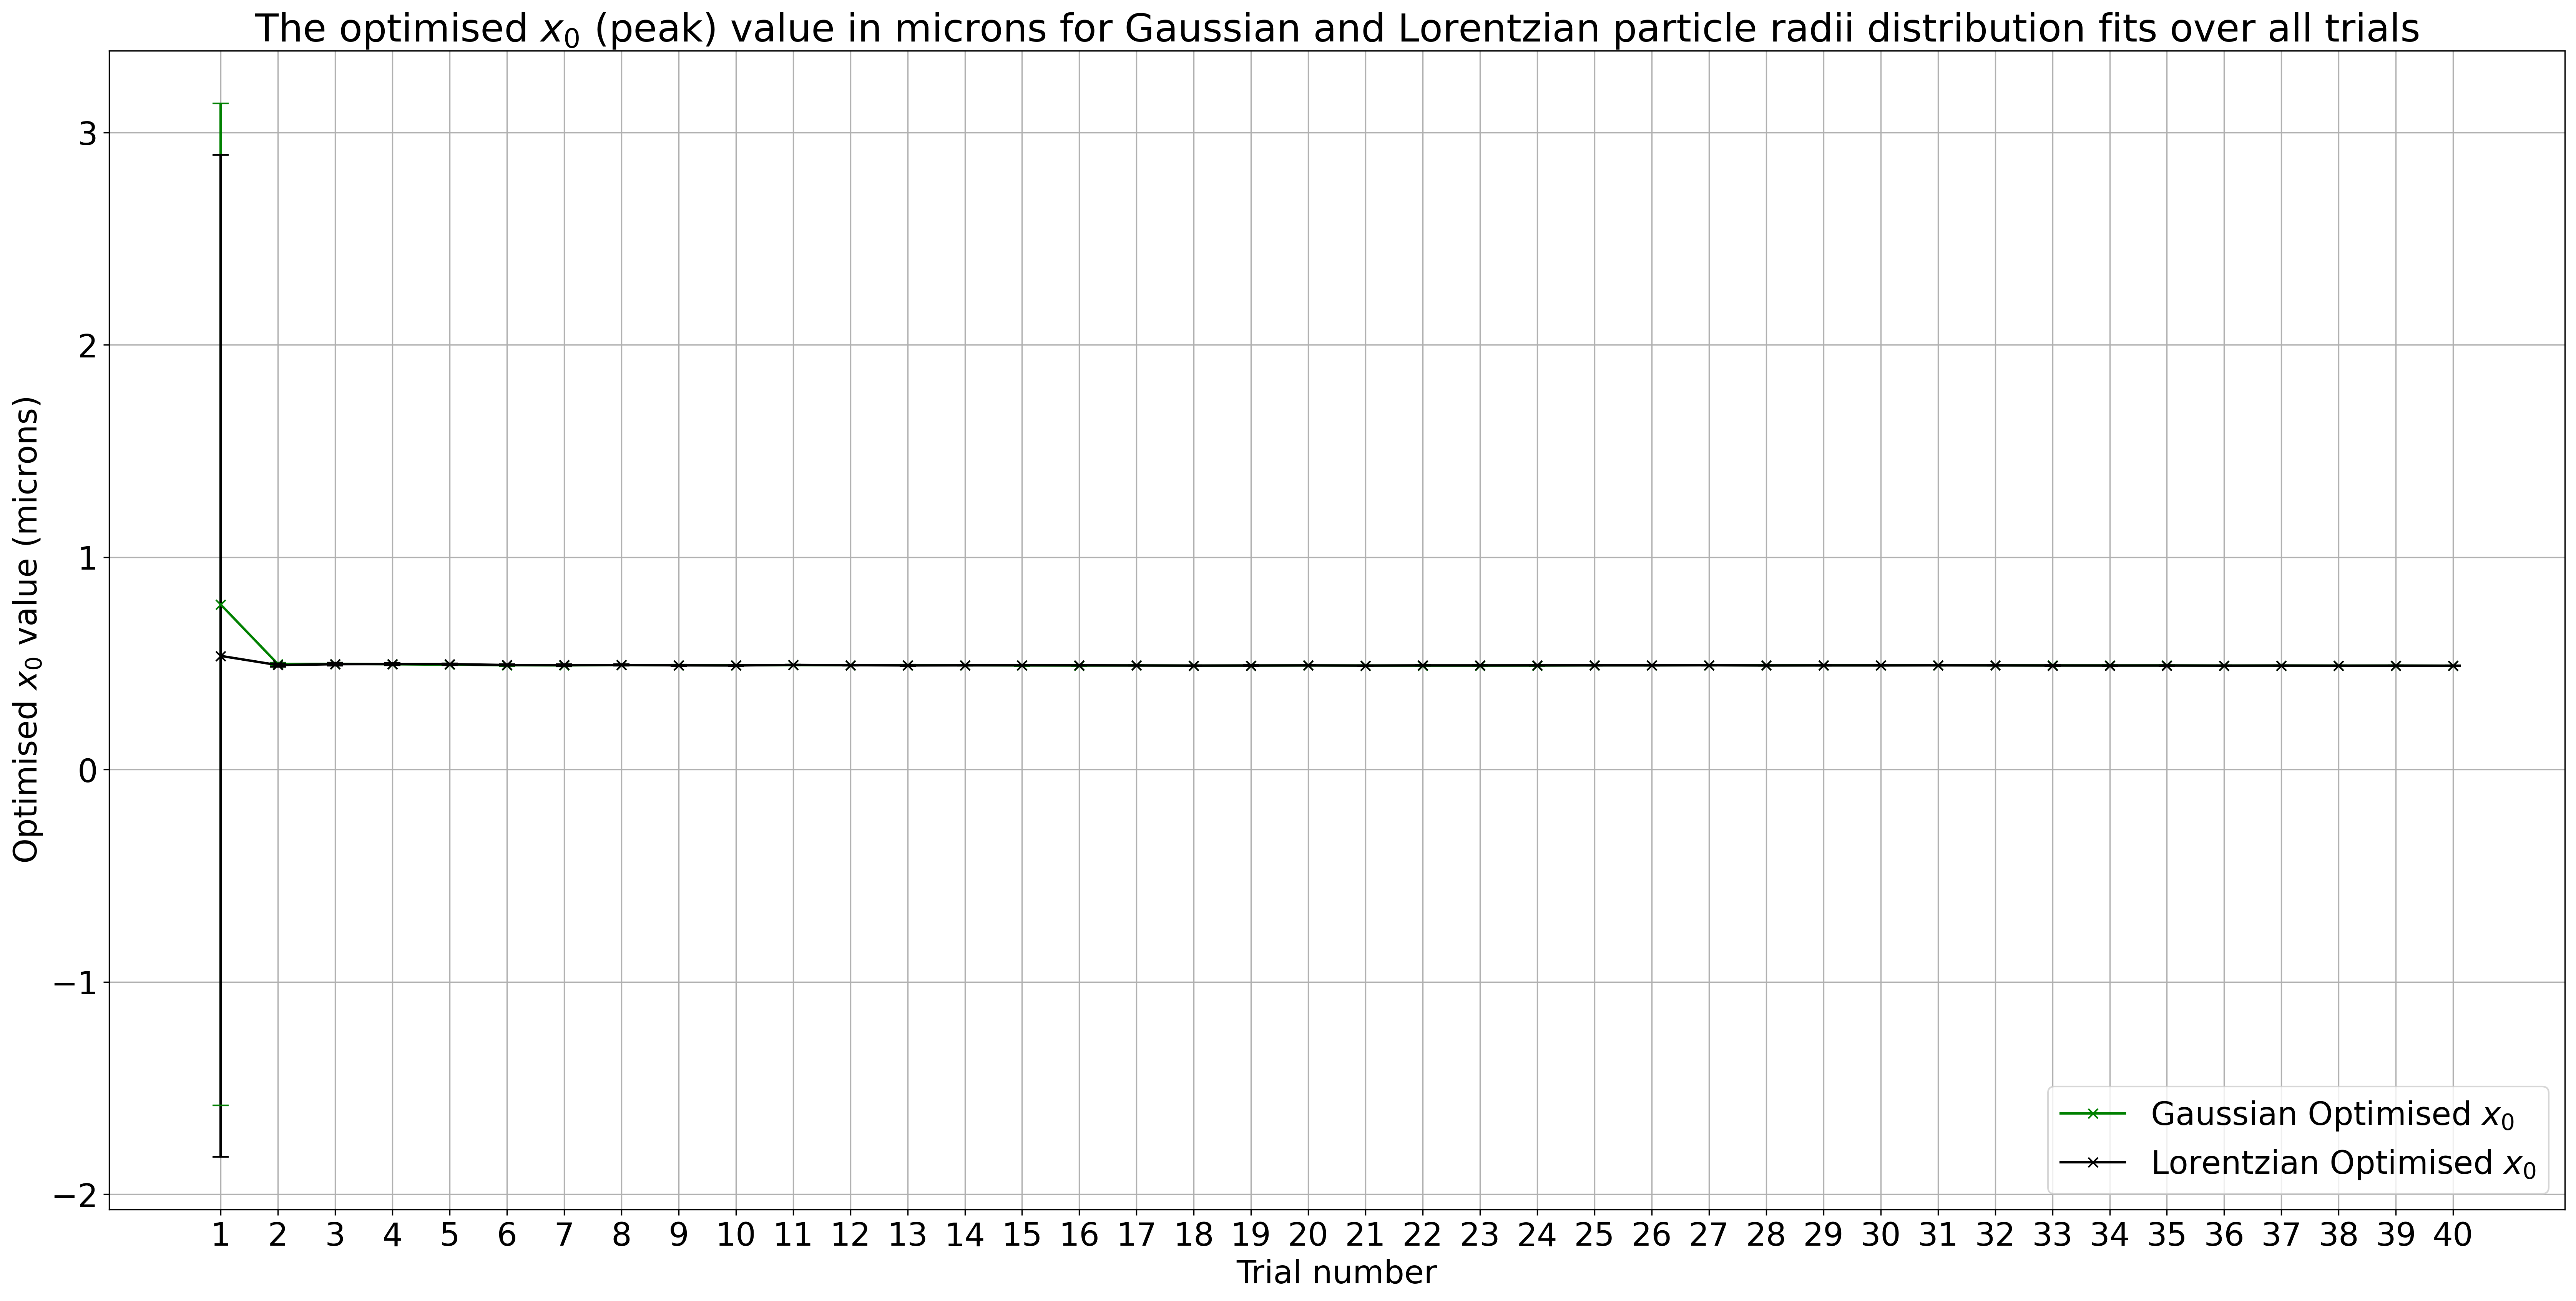

In [833]:
#Creating a plot for the x_0 values per trial
fig = plt.figure(figsize=(30,15),dpi=300)
ax  = fig.add_subplot(1,1,1) 

plt.rc("font", size=20)
plt.xlabel("Trial number", size=20)
plt.ylabel("Optimised $x_0$ value (microns)", size=20)
plt.title("The optimised $x_0$ (peak) value in microns for Gaussian and Lorentzian particle radii distribution fits over all trials")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.plot(number, x0G, color="g", label="Gaussian Optimised $x_0$", marker='x')
plt.errorbar(number, x0G, yerr=x0G_err, capsize=5, color="g", ls='none') 
plt.plot(number, x0L, color="0", label="Lorentzian Optimised $x_0$", marker='x')
plt.errorbar(number, x0L, yerr=x0L_err, capsize=5, color="0", ls='none') 
plt.xticks(number)
plt.axes()
plt.grid()
plt.legend(loc = 'lower right')
plt.show()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


<ipython-input-846-54e0784bfc25>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


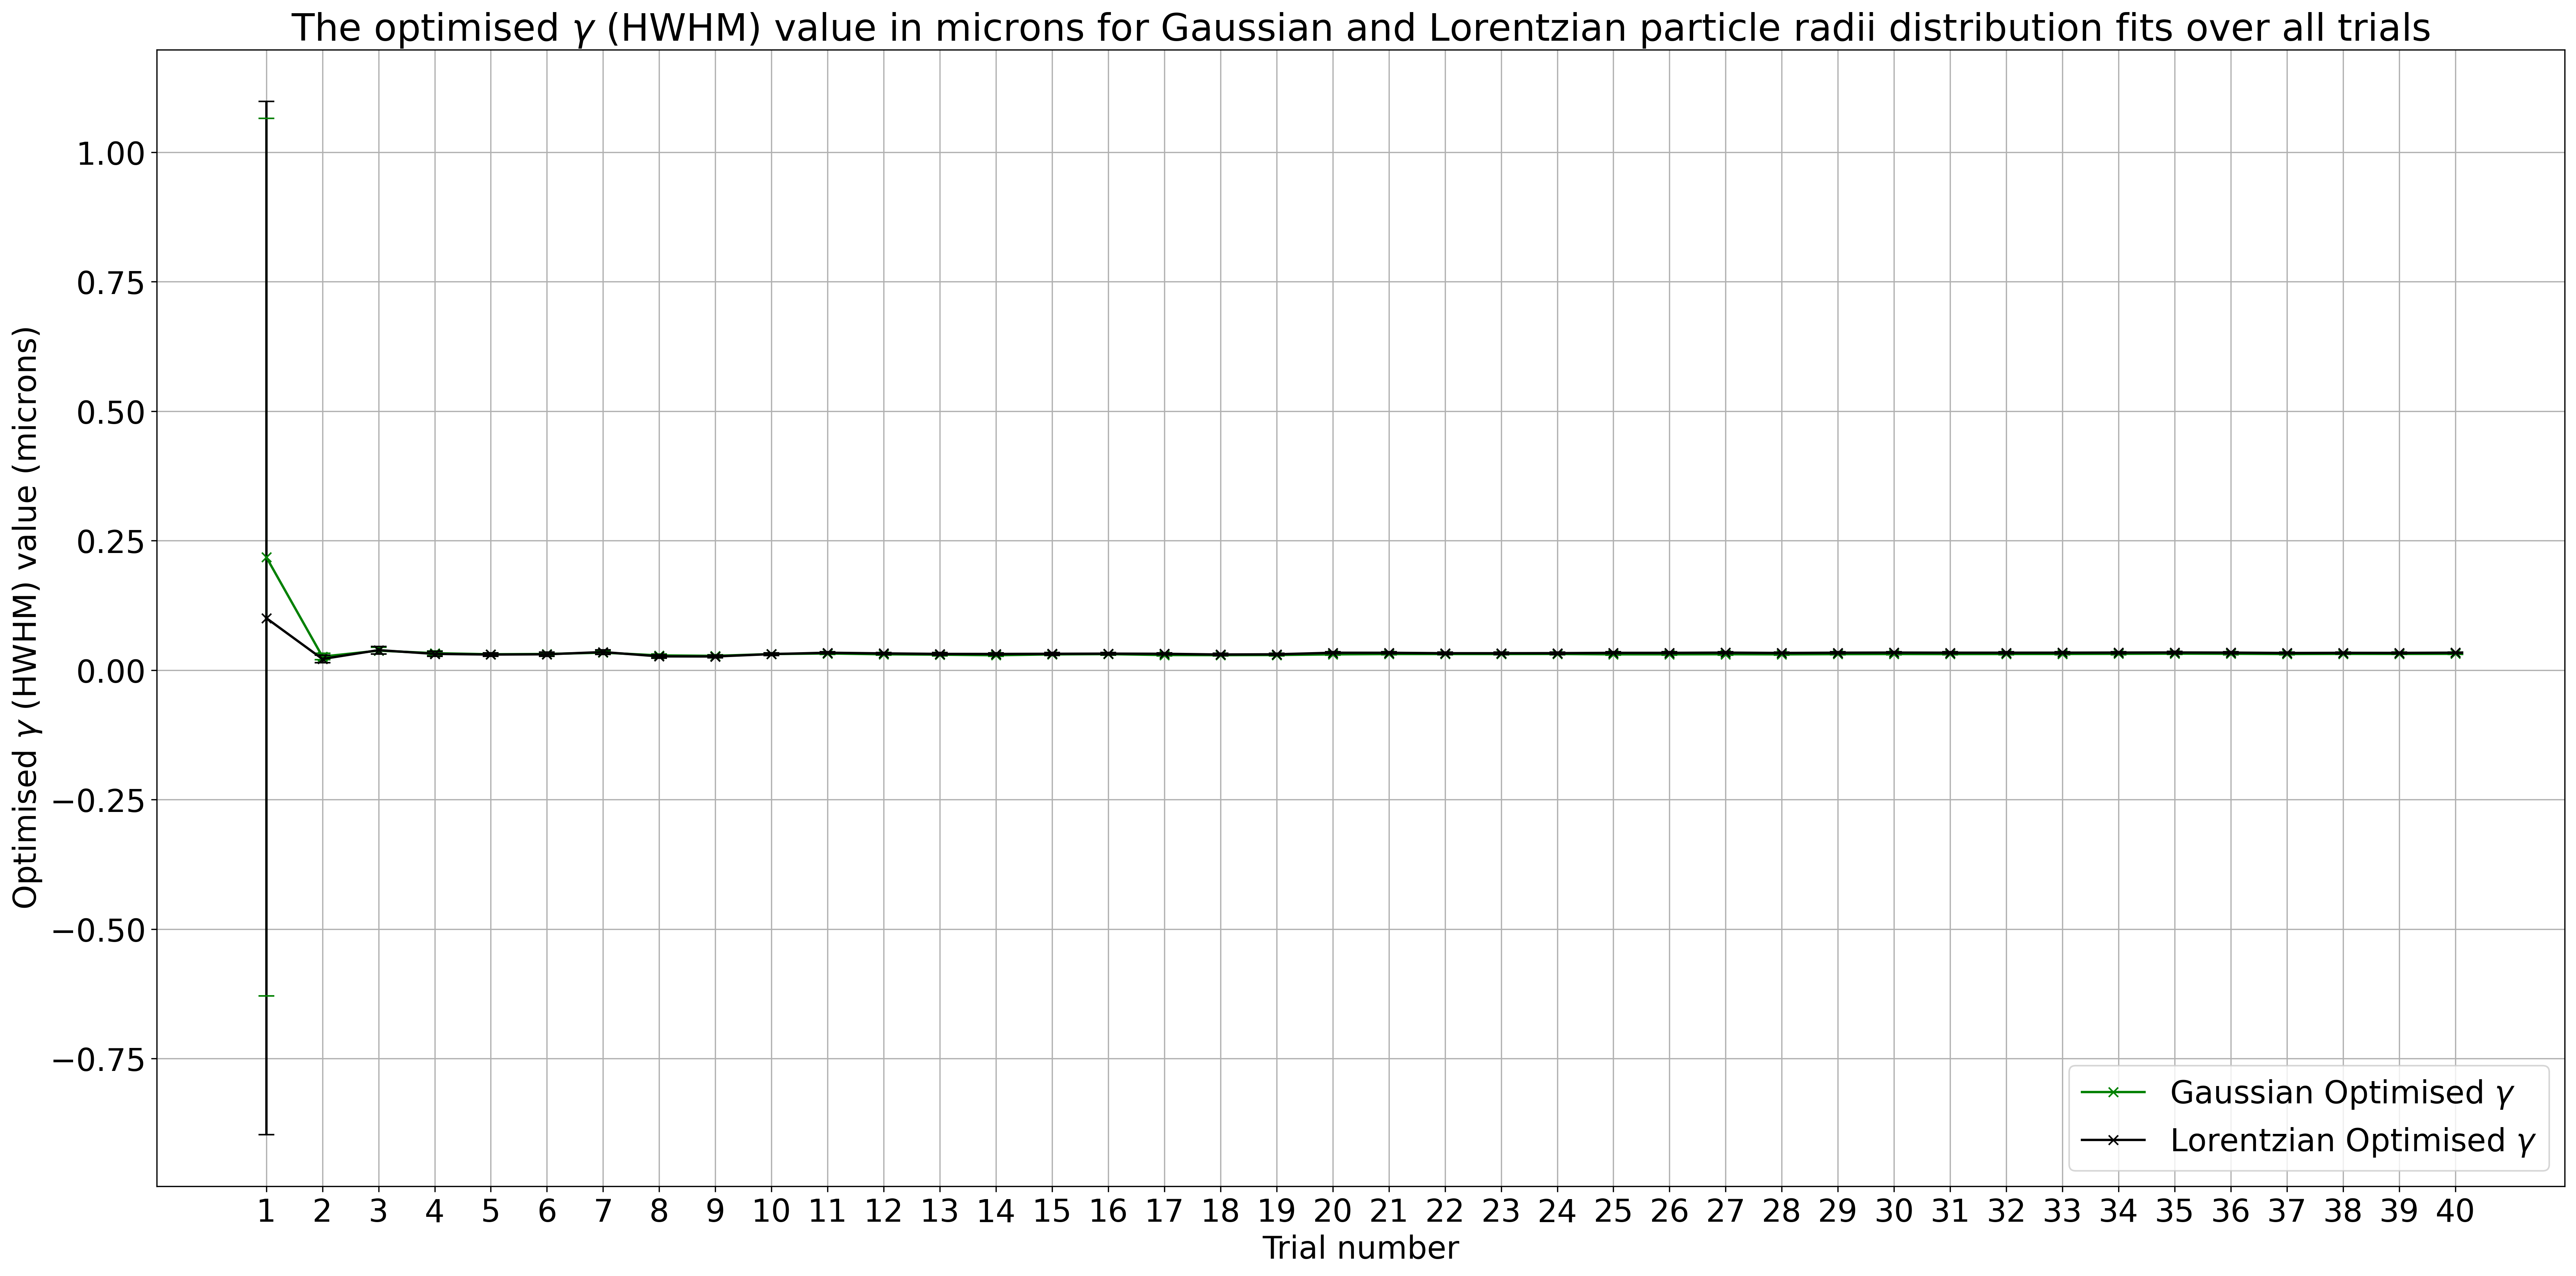

In [846]:
#Creating a plot for the gamma values per trial
fig = plt.figure(figsize=(30,15),dpi=300)
ax  = fig.add_subplot(1,1,1) 


plt.rc("font", size=20)
plt.xlabel("Trial number", size=20)
plt.ylabel("Optimised $\gamma$ (HWHM) value (microns)", size=20)
plt.title("The optimised $\gamma$ (HWHM) value in microns for Gaussian and Lorentzian particle radii distribution fits over all trials")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.plot(number, gammaG, color="g", label="Gaussian Optimised $\gamma$ ", marker='x')
plt.errorbar(number, gammaG, yerr=gammaG_err, capsize=5, color="g", ls='none') 
plt.plot(number, gammaL, color="0", label="Lorentzian Optimised $\gamma$", marker='x')
plt.errorbar(number, gammaL, yerr=gammaL_err, capsize=5, color="0", ls='none') 
plt.xticks(number)
plt.axes()
plt.grid()
plt.legend(loc = 'lower right')
plt.show()


<ipython-input-847-1d58f39ef08f>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


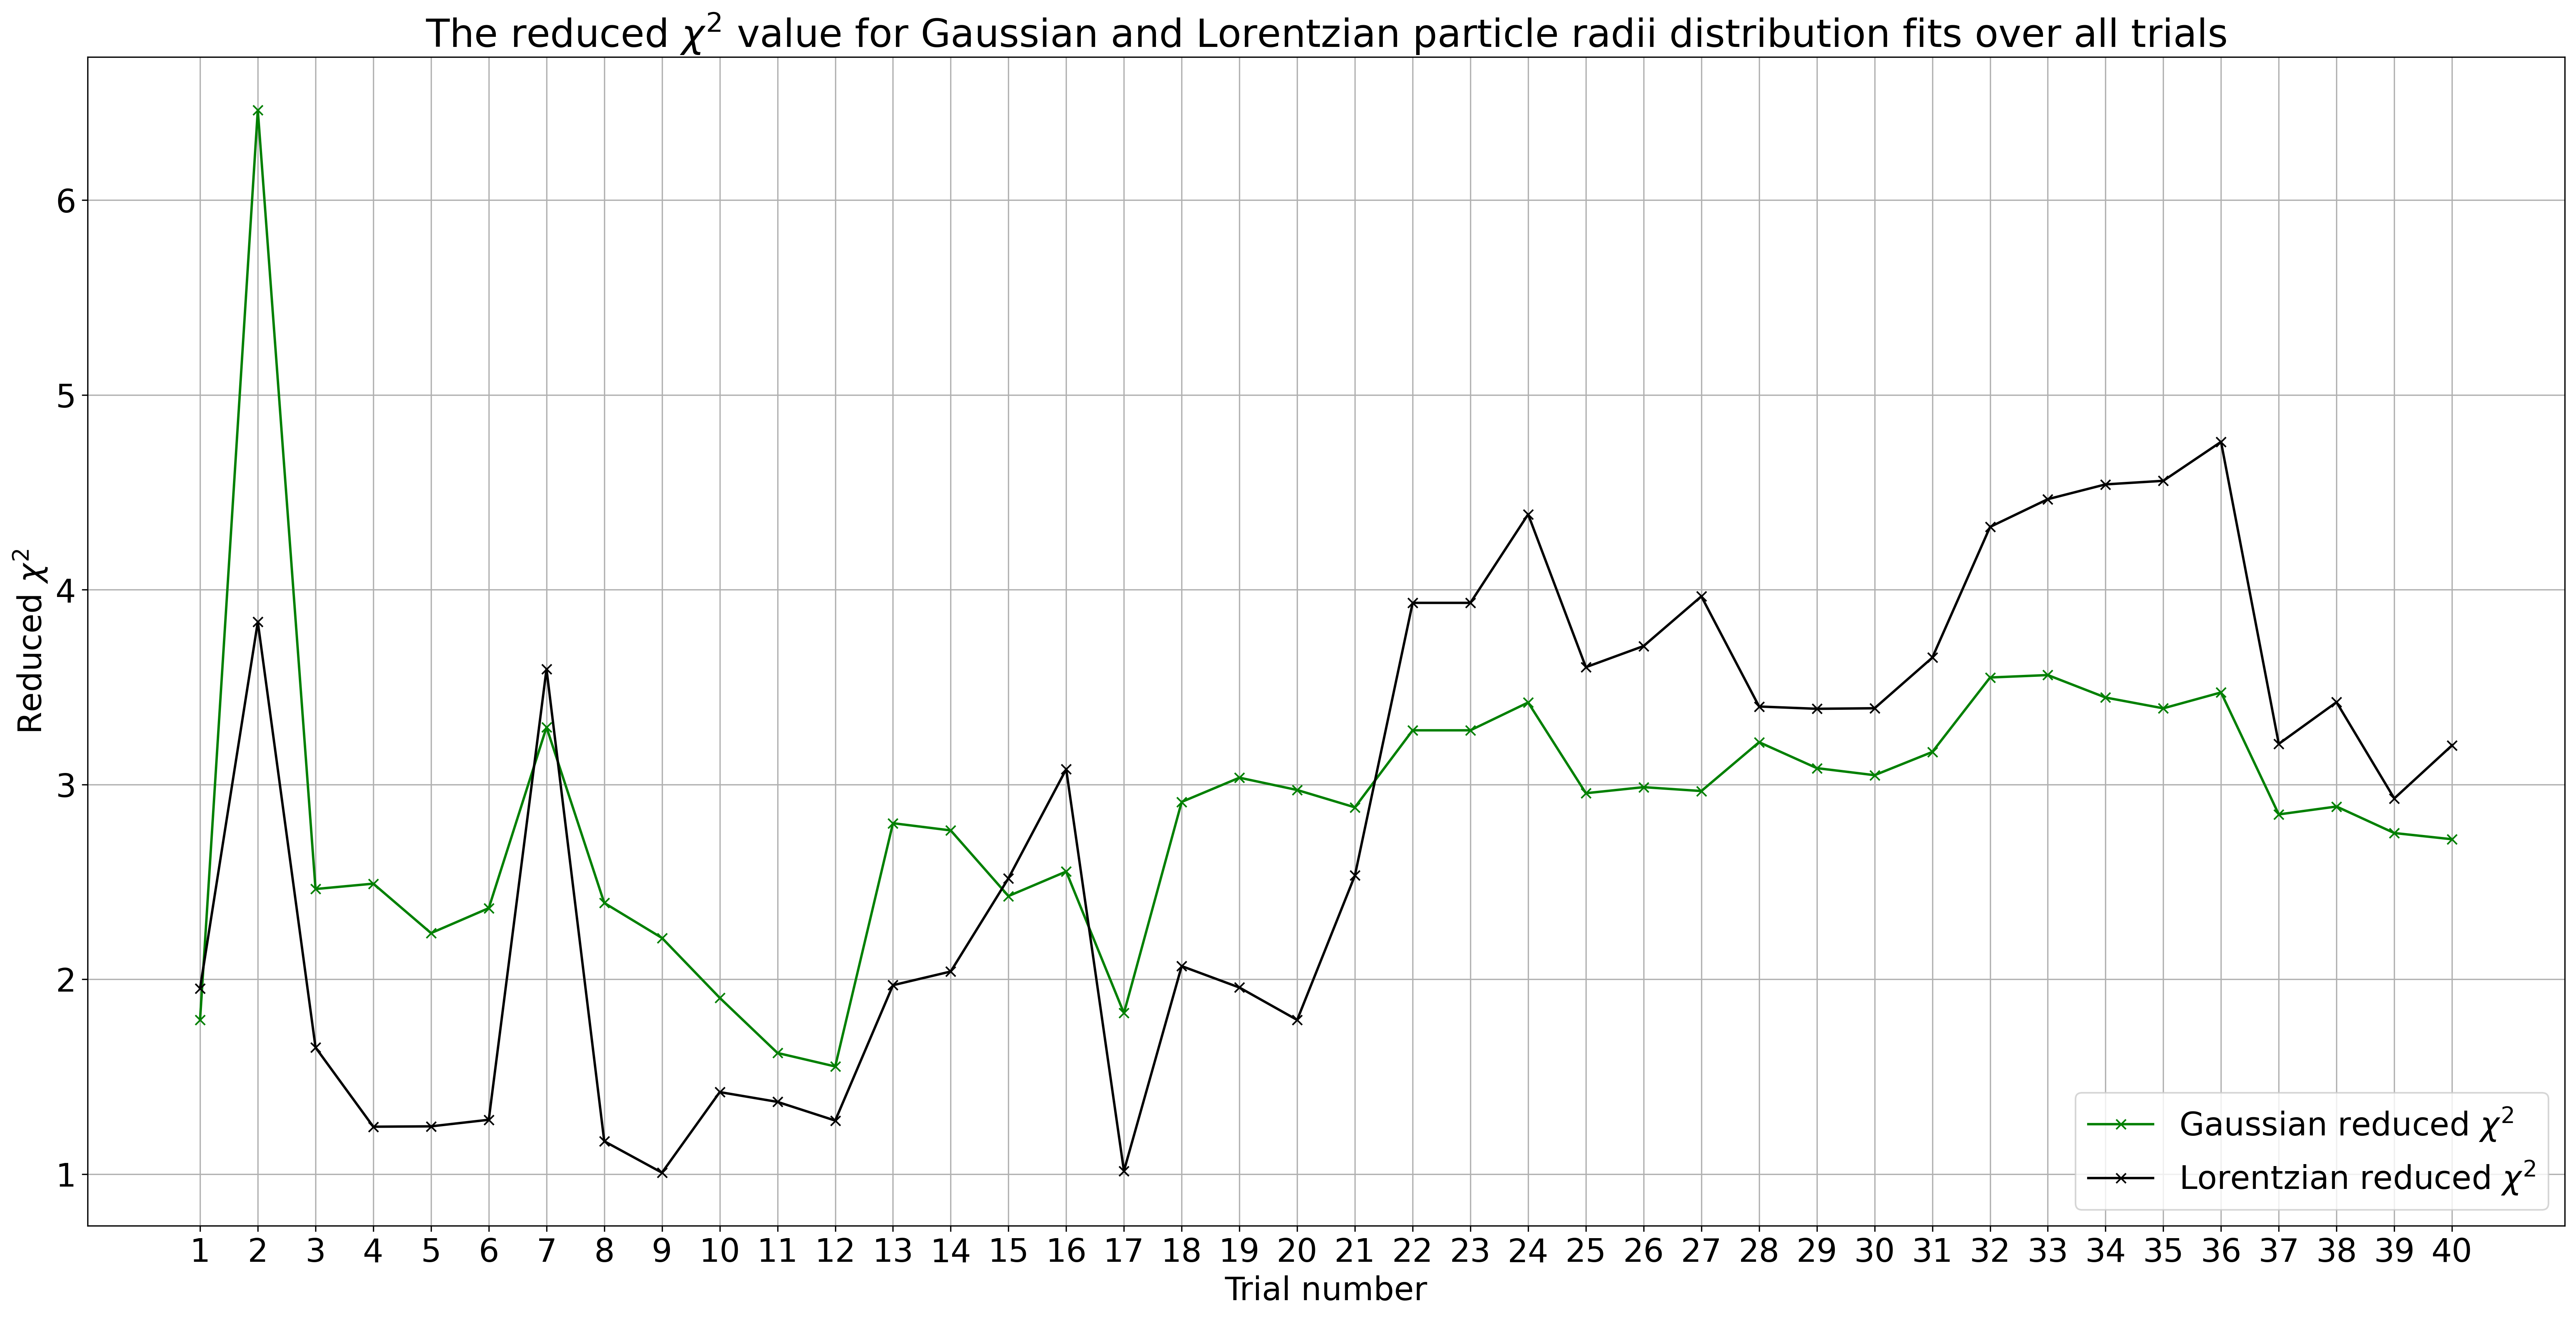

In [847]:
#Plotting the reduced chi squared values per trial

fig = plt.figure(figsize=(30,15),dpi=300)
ax  = fig.add_subplot(1,1,1) 
plt.rc("font", size=20)
plt.xlabel("Trial number", size=20)
plt.ylabel("Reduced $\chi^2$", size=20)
plt.title("The reduced $\chi^2$ value for Gaussian and Lorentzian particle radii distribution fits over all trials")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.plot(number, chisqG, color="g", label="Gaussian reduced $\chi^2$", marker='x')
plt.plot(number, chisqL, color="0", label="Lorentzian reduced $\chi^2$", marker='x')
#no error bars in non-parametric test like chi-squared, as it's an estimation in itself
plt.xticks(number)
plt.axes()
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

# The Posterior Ratio

In [826]:
from scipy import integrate

#gaussian function for purposes of determining probability of the best fit
def gaussian_bestfit(r, sigma):
    return ((1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(r/sigma)**2))

def prob_bestfit(r, sigma, rad_cen_new):

    #Defining empty lists to fill with non infinite variables
    r_new = []
    sigma_new = []
    rad_cen_new2 = []
    indiv_prob_list = []
    
    #Determing the products of Gaussian functions at all bin values, with appropriate values and errors, for total probability
    for i in range (len(r)):
        
        #finding the individual probability of each point using Gaussian distribution
        indiv_prob = gaussian_bestfit(r[i], sigma[i])
        
        #If the value is not 'nan' or incorrectly small then apply to original values 
        if str(indiv_prob) != "nan" and indiv_prob > 10**(-5):
            r_new.append( r[i])
            sigma_new.append(sigma[i])
            rad_cen_new2.append(rad_cen_new[i])
            
            indiv_prob_list.append(indiv_prob)
    
    #Integral values drastically underestimate, so used sum instead. But see code below if interested:
    #integral = np.trapz(np.array(indiv_prob_list), np.array(rad_cen_new2))
    #integral = integrate.cumtrapz(np.array(indiv_prob_list), np.array(rad_cen_new2))
    #print("Integral is: " + str(integral))
    #indiv_probs_norm = indiv_prob_list / integral

    #Finding total normalised probability of best fit
    indiv_probs_norm = indiv_prob_list / sum(indiv_prob_list)
    result = np.prod(np.array(indiv_probs_norm))  
    print("The final total probability value for the best fit is: " + str(result))
    return result, indiv_prob_list


prob_gau, indiv_probs_gau = prob_bestfit(r_gau, rel_freq_err_new, rad_cen_new)
prob_lor, indiv_probs_lor = prob_bestfit(r_lor, rel_freq_err_new, rad_cen_new)

The final total probability value for the best fit is: 5.2174583406398754e-77
The final total probability value for the best fit is: 1.3785869783255662e-76


<ipython-input-826-b5076e0fa5b0>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return ((1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(r/sigma)**2))
<ipython-input-826-b5076e0fa5b0>:4: RuntimeWarning: invalid value encountered in double_scalars
  return ((1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*(r/sigma)**2))


# Variational Method for $\delta x_0 $ and $\delta \gamma$ values

Plotting data.
Constructing histogram for overplotting with errors and curve fitting.
The numpy.median for the array of rad_cen_new is 0.4534793086239345 and the numpy.std is 0.1388480927711367
The optimised values for x_0 and sigma and amplitude are 0.4886976115638329, 0.039223398122075315, 0.011676754764580155
Overplot fit onto data.
rmin and rmax are: 0.2141338247093057, 0.76326139841836
Calculate normalised residuals.
Reduced chi-squared for the Gaussian is: 5.235209272685908
The numpy.mean for the array of rad_cen is 0.45347930862393443 and the numpy.std is 0.1388480927711367
x_0 and gamma and B1 are 0.4886530354164499, 0.035927930589557525, 0.015008055264399604
Overplot fit onto data.
rmin and rmax are: 0.2750687346717342, 0.7022373361611656
Calculate normalised residuals.
Reduced chi-squared for the Lorentzian is: 3.4988207924253483
0.00012813677607631524 5.326952849749045e-05 0.007629201234229874 0.0021217934438030606


<ipython-input-816-1fc0cdf944ed>:49: RuntimeWarning: divide by zero encountered in double_scalars
  res = ((fk-dk)/sk)**2
<ipython-input-817-8e2b420f0af7>:50: RuntimeWarning: divide by zero encountered in double_scalars
  res = ((fk-dk)/sk)**2


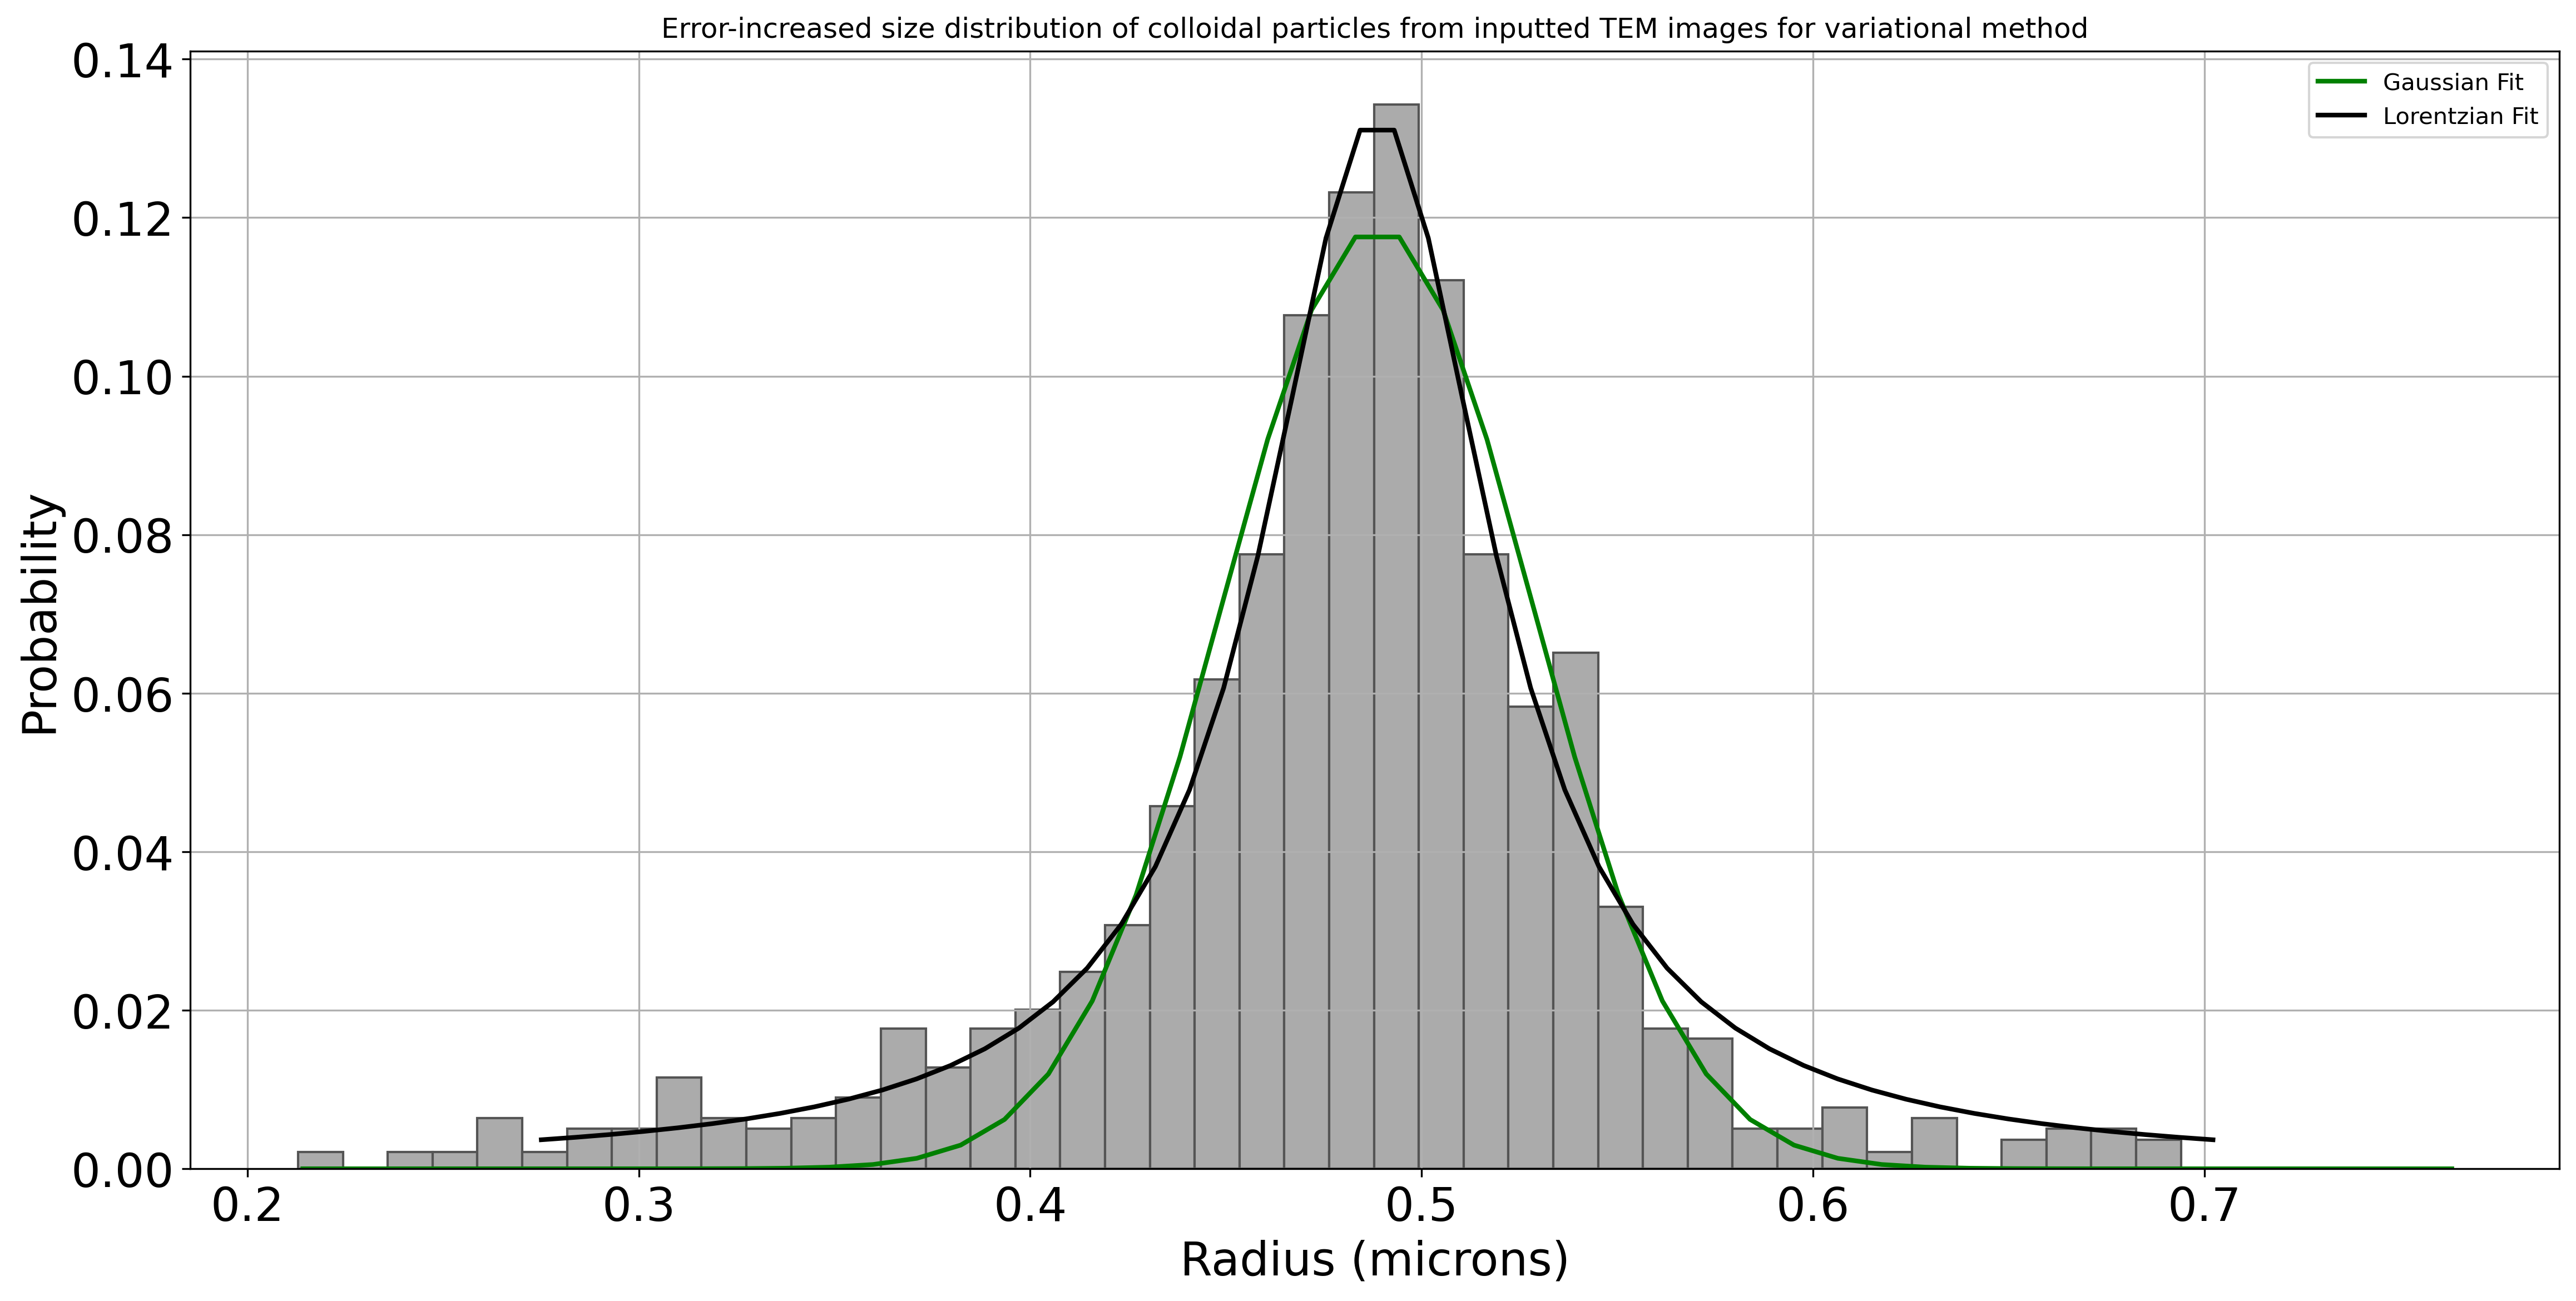

In [848]:
#Applying the variational method to check the errors on x_0 and gamma
#This involves plotting a new histogram with the vertical errors added onto the values and re-fitting
#Then, take the difference in optimised values of x_0 and gamma to get the errors
#In this case, this always underestimated

#Function for making and displaying the histogram
def hist_maker_var(data) :
    # Plot data in histogram
    print("Plotting data.")

    #Make graph using subplots
    fig = plt.figure(figsize=(20,10),dpi=300)
    ax  = fig.add_subplot(1,1,1) 
    plt.rc("font", size=10)
    plt.xlabel("Radius (microns)", size=20)
    plt.ylabel("Probability", size=20)
    plt.title("Error-increased size distribution of colloidal particles from inputted TEM images for variational method")
    plt.subplots_adjust(bottom=0.21, left=0.19)
    plt.grid()
    
    #Make (normalised) histogram and plot it.
    hist, bin_edges = histogram(data, bins='auto', density=True)
    num_of_bins = len(hist)
    
    hist_norm = hist/hist.sum()
    hist_var = hist_norm + rel_freq_err_new
    widths = bin_edges[:-1] - bin_edges[1:]
    plt.bar(bin_edges[1:], hist_var, width=widths, color="0.67", edgecolor="0.33")
    print("Constructing histogram for overplotting with errors and curve fitting.")

    return hist_var, bin_edges

hist_var, bin_edges_var = hist_maker_var(all_radii_new)

popt_gau_var, perr_gau_var, _ = gaussian_fit(all_radii_new, hist_var)
popt_lor_var, perr_lor_var, _ = lorentzian_fit(all_radii_new, hist_var)

#Defining variational method errors
delta_x0G = abs(average - popt_gau_var[0])
delta_x0L = abs(x_0_cf - popt_gau_var[0])
delta_gammaG = abs(gamma_gau - popt_gau_var[1])
delta_gammaL = abs(gamma_cf - popt_lor_var[1])
print (delta_x0G, delta_x0L, delta_gammaG, delta_gammaL)

In [828]:
#Defining and printing the Posterior Ratio (PR), which in this case is the same as the Bayes Factor
gau_component = average_err*gamma_gau_err*prob_gau
lor_component = x_0_cf_err*gamma_cf_err*prob_lor
PR = gau_component / lor_component
print("The Posterior Ratio is thus: " + str(PR))

The Posterior Ratio is thus: 0.3214133433017451


In [829]:
#Using an input statement as a way to store the values of previous runs, as runs accummulate 
query = input("Add to previous list? Answer [y]/[n]. If first time then write [n] ")
if query == "n":
    PR_list = [PR]
elif query == "y":
    PR_list.append(PR)
    

Add to previous list? Answer [y]/[n]. If first time then write [n] y


# Plotting the Posterior Ratio

In [830]:
#Defining the x-axis values as trial number (i.e. number of directory loaded)
trials = []
for i in range(1,len(PR_list)+1):
    trials.append(i)
    
#Reminding user of total number of values analysed
print("Total number of values analysed is: " + str(len(all_radii_new)))


Total number of values analysed is: 939


<ipython-input-856-ed22c19f18fc>:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.semilogy(trials, PR_list, color="0", marker="x")
<ipython-input-856-ed22c19f18fc>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


1.0166184578621529
2269.913788153932
0.1010553962066238
0.014452885780618893
0.04674817435454081
0.13731929297918707
6.697002104422443
0.0002596837933279089
9.888549347072759e-05
0.2094786599661108
7.613744336072829
4.627492270043161
2.0643015518788115
0.21058129597258163
187.13340282230627
9318.463356261715
0.016472980672577932
0.2147259656765839
0.2576937120065174
0.4221814796008347
0.9333056341979634
0.011562066102312057
0.011562066102312057
0.09225038156381415
62705499.49952321
19217733.126220275
12.20680696097658
0.005074978077226152
7701159.990457883
9305422.036804082
25899234.286013287
0.014984988070504754
0.02024949376488193
0.03552279381956856
0.008506412782579645
0.012871617493648771
1250654993.4052856
32315325893.376347
0.03789332135572998
0.3214133433017451


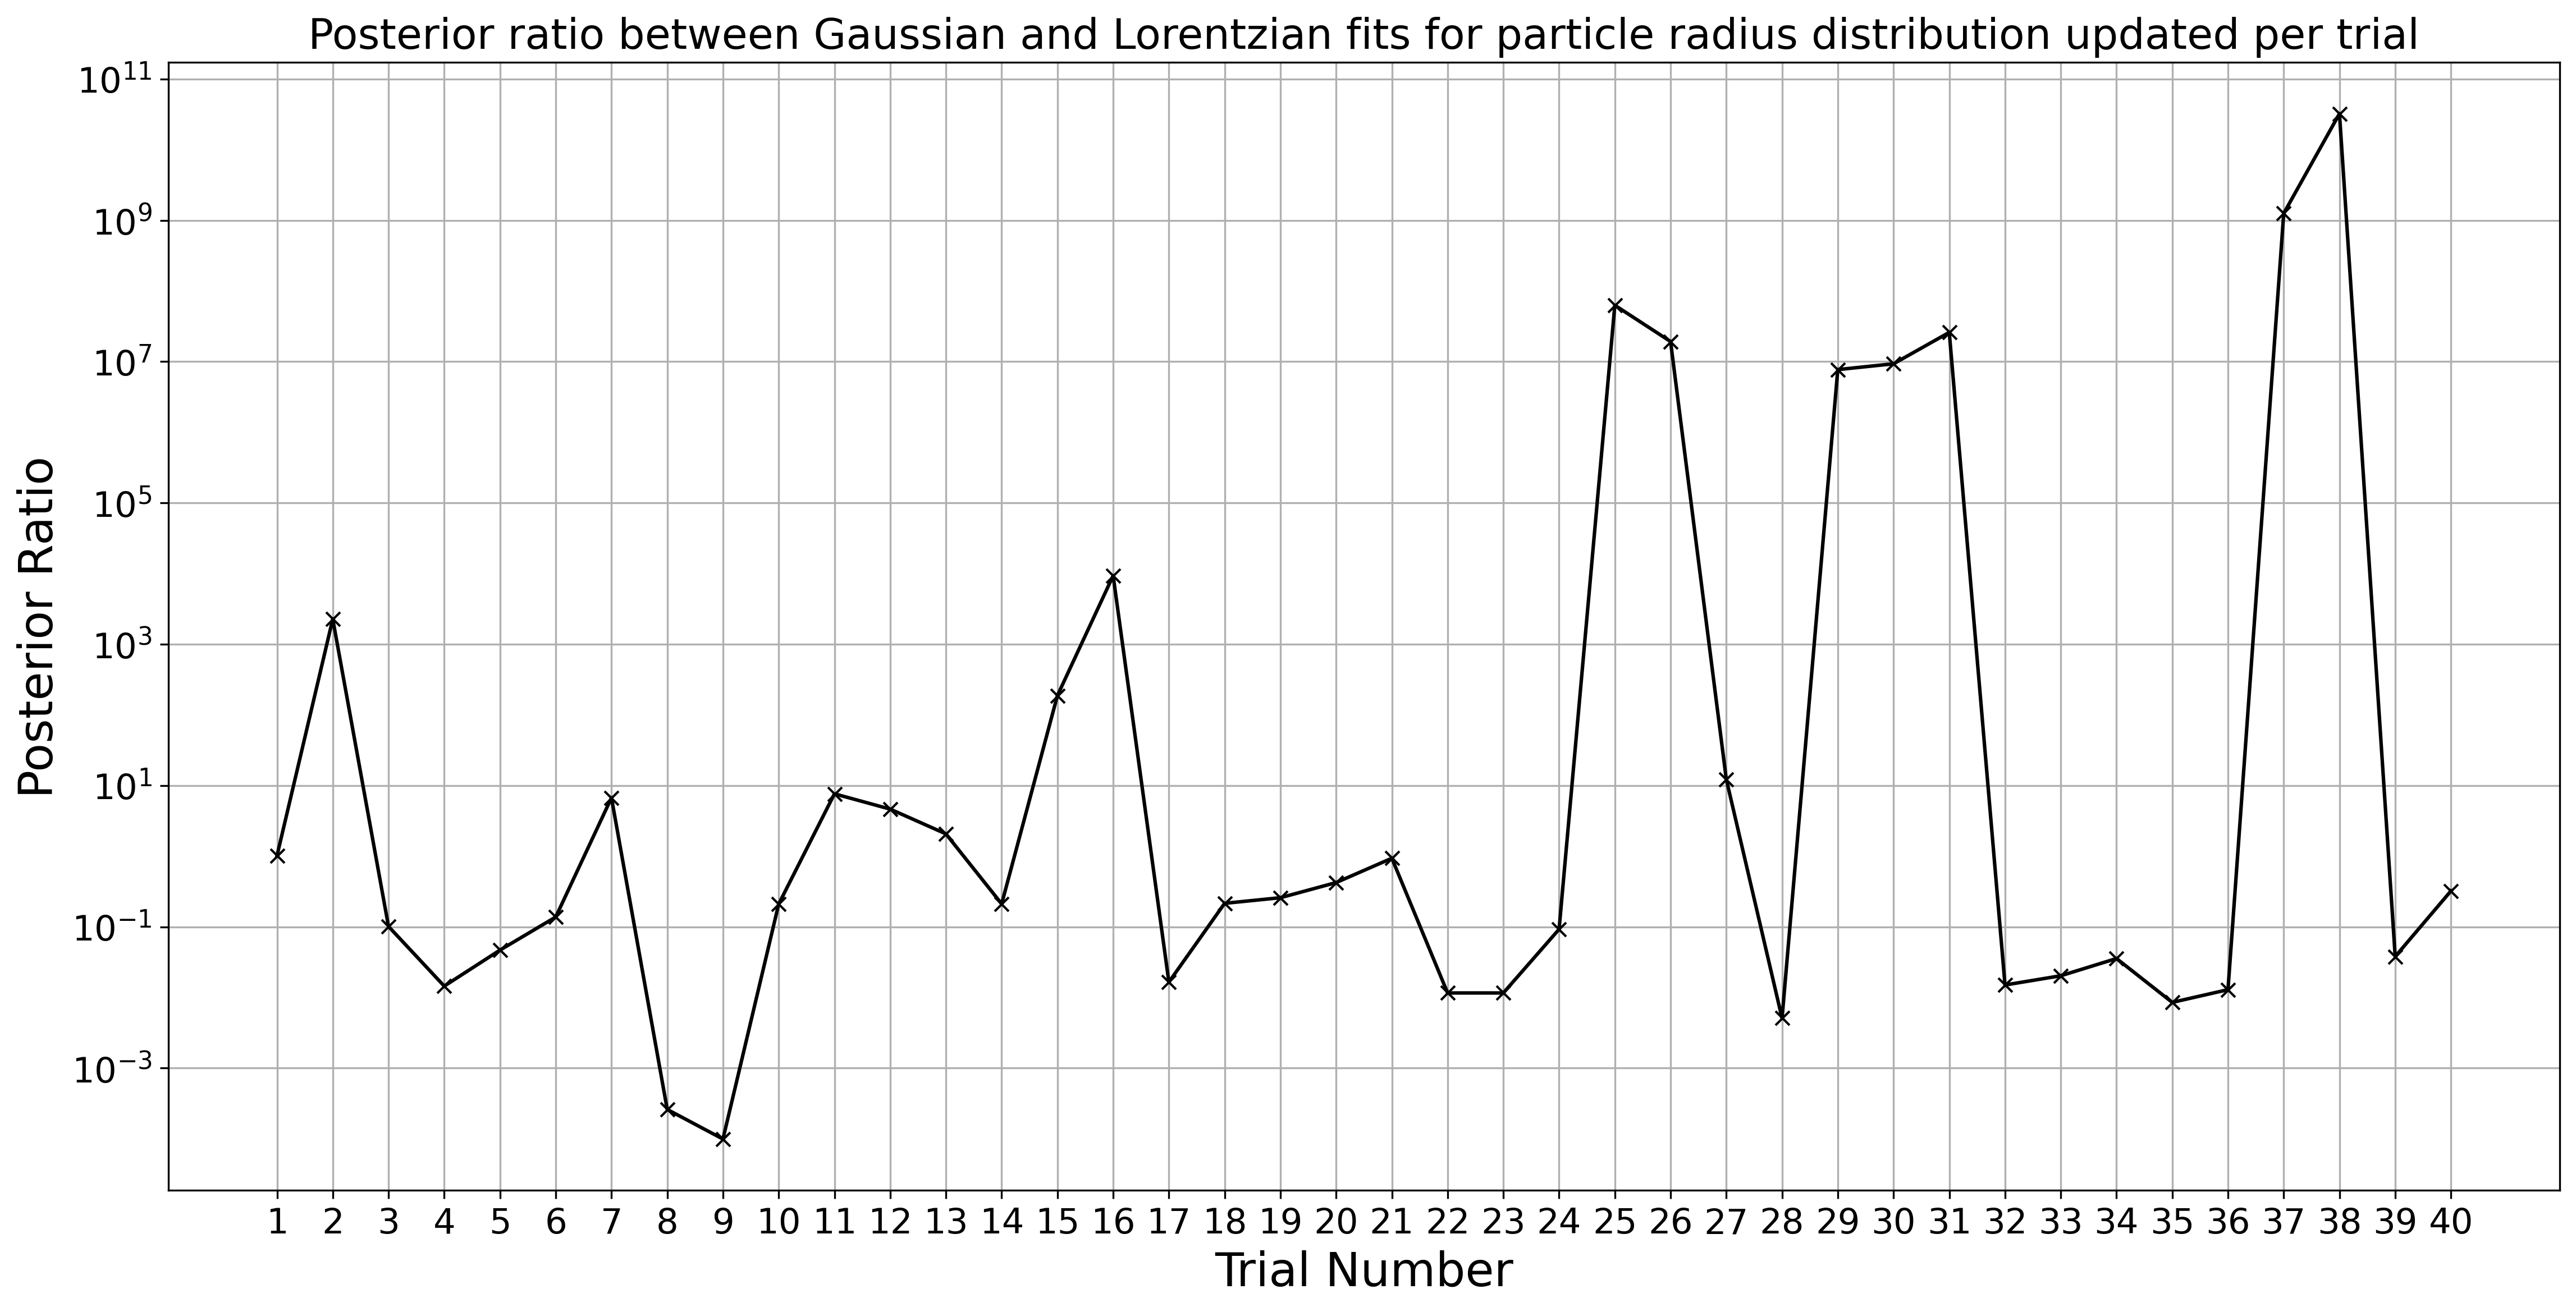

In [856]:
#Plotting the posterior ratio over time using a logarithmic plot to make clearer the nature of the ratio

#Defining subplots and plotting the posterior ratio with respect to the trial number
fig = plt.figure(figsize=(20,10),dpi=300)
ax  = fig.add_subplot(1,1,1)
ax.axhline(y=0, c='k', ls='--',  visible = True)
ax.semilogy(trials, PR_list, color="0", marker="x")


plt.rc("font", size=15)
plt.xlabel("Trial Number", size=20)
plt.ylabel("Posterior Ratio", size=20)
plt.title("Posterior ratio between Gaussian and Lorentzian fits for particle radius distribution updated per trial")
plt.subplots_adjust(bottom=0.21, left=0.19)
#plt.plot(trials, PR_list, color="0", marker="x")

plt.xticks(range(1,len(trials)+1))
plt.axes()
plt.grid()


for i in range(len(PR_list)): print(PR_list[i])
plt.show()


# Posterior Ratio Errors (abandoned)

In [ ]:
#ABANDONED
#An unsuccessful attempt at error propagation that was somewhat excessive and not completable due to time constraints
#Nevertheless, for interest, the code attempt is shown below:

#For the best fit probabilitites
indiv_prob_list2 = []
for i in range (len(rel_freq_err_new)):
    indiv_prob = 1/(rel_freq_err_new[i]*np.sqrt(2*np.pi))*np.exp(-0.5*r_gau[i]**2/rel_freq_err_new[i]**2)/integral_gau
    indiv_prob_list2.append(indiv_prob)
#print(indiv_prob_list2)

#best fit gaussian function
def gaussian_bestfit(r, sigma):
    return ((1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(r/sigma)**2))
    
#eerror propagation function
def error_func(y, a, da, b, db):
    return  y * np.sqrt( (da/a)**2 + (db/b)**2 )

#Should result in only one value
#function to create all the errors sequentially
def PR_errors(sigma, r, indiv_prob):
    sigma_err = 1 / np.sqrt(2 * len(all_radii_new) - 2)
    
    print(len(indiv_prob), len(sigma))
    indiv_prob_error_list = []
    total_error_list = []
    for i in range (len(sigma)):
        
        first = r / sigma
        
        partial_error_powerbit = -0.5 * error_func(first[i], r[i], rel_freq_err_new[i], sigma[i], sigma_err  )
        #print(partial_error_powerbit)

        partial_error_expbit = indiv_prob[i] * partial_error_powerbit / (-0.5*(r[i]/sigma[i])**2)
        #print(partial_error_expbit)
        
        indiv_prob_error = error_func(indiv_prob[i], (indiv_prob[i] * sigma[i]), partial_error_expbit, sigma[i], sigma_err )
        #indiv_prob_error = indiv_prob[i] * np.sqrt( (partial_error_expbit / (indiv_prob[i] * sigma[i])  )**2 + ( sigma_err / sigma[i] )**2)
        indiv_prob_error_list.append(indiv_prob_error)
        print(indiv_prob_error)
        
        
        #Add error propagation with delta values and such.
        #This is overkill for this project, but is open for further development.
        
        """
        if i==0:
            total_error = indiv_prob_error
        elif indiv_prob_error != "nan":
            total_error = PR_list[i] * np.sqrt( ( indiv_prob_error_list[i-1]/indiv_prob[i-1] )**2 + ( indiv_prob_error_list[i]/indiv_prob[i] )**2)
        total_error_list.append(total_error)
        """
        #print(PR_list[i], total_error)
    return total_error_list

total_error_list = PR_errors(rel_freq_err_new, r_gau, indiv_prob_list2)
print(len(total_error_list), len(PR_list))

In [ ]:
#Plotting the posterior ratio with errors

#Defining subplots and plotting the posterior ratio with respect to the trial number
fig = plt.figure(figsize=(20,10),dpi=300)
ax  = fig.add_subplot(1,1,1) 
plt.rc("font", size=15)
plt.xlabel("Trial Number", size=20)
plt.ylabel("Posterior Ratio", size=20)
plt.title("Posterior ratio between Gaussian and Lorentzian fits for particle radius distribution updated per trial")
plt.subplots_adjust(bottom=0.21, left=0.19)
plt.plot(trials, PR_list, color="0", marker="x")
plt.errorbar(trials, PR_list, yerr = total_error_list, capsize=5, color="0", ls='none') 
plt.xticks(range(1,len(trials)+1))
plt.axes()
plt.grid()
plt.show()

# Resetting

In [ ]:
#A function which reduces the contents of all_radii to nothing
def clear_all_radii(all_radii):
    
    #Deletes everything in all_radii, alternatively go back to the beginning and re-make all_radii array
    for i in range(0, len(all_radii)):
        all_radii = np.delete(all_radii, 0, 0)
    print("all_radii is now null: " + str(all_radii) + ", because of the use of clear_all_radii function")
    return all_radii

#Asks user to confirm
if input("Do you wish to reset? (y/n) ") == "y":
    all_radii = clear_all_radii(all_radii)